# Employee Attrition Analysis

In [53]:
print('Andi Anugrah Mahyuddin')

Andi Anugrah Mahyuddin


# Problem Business

#### Context

The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.

#### Content

I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

Source : https://www.kaggle.com/datasets/patelprashant/employee-attrition

## Dataset : Employee

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

# Import Library

In [54]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#===== Other =====#
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [55]:
df = pd.read_csv('/Volumes/HDD/Dataset/employee.csv')
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [56]:
df.tail()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
2939,2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                2940 non-null   int64 
 1   EmployeeNumber            2940 non-null   int64 
 2   Attrition                 2940 non-null   object
 3   Age                       2940 non-null   int64 
 4   BusinessTravel            2940 non-null   object
 5   DailyRate                 2940 non-null   int64 
 6   Department                2940 non-null   object
 7   DistanceFromHome          2940 non-null   int64 
 8   Education                 2940 non-null   int64 
 9   EducationField            2940 non-null   object
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

#### Drop kolom yang tidak dibutuhkan

In [58]:
columns_to_drop = ['EmployeeNumber', 'Over18', 'Unnamed: 0']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [59]:
df.duplicated().sum()

1470

In [60]:
df = df.drop_duplicates()

## Exploratory Data Analysis

In [61]:
df.describe().T #Untuk menampilkan ringkasan statistik di tiap kolom numerik secara horizontal

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


1. Umur (Age):

Rata-rata usia karyawan adalah sekitar 36.92 tahun dengan standar deviasi 9.13 tahun.
Usia termuda adalah 18 tahun, sedangkan usia tertua adalah 60 tahun.

2. Gaji Bulanan (MonthlyIncome):

Rata-rata gaji bulanan karyawan adalah sekitar 6502.93 ribu IDR dengan standar deviasi 4707.16 ribu IDR.
Gaji bulanan terendah adalah 1009 ribu IDR, sedangkan gaji bulanan tertinggi adalah 19999 ribu IDR.

3. Lama Bekerja di Perusahaan (YearsAtCompany):

Rata-rata lama bekerja di perusahaan karyawan adalah sekitar 7.01 tahun dengan standar deviasi 6.13 tahun.
Lama bekerja terpendek adalah 0 tahun, yang mungkin menunjukkan karyawan baru atau yang baru saja bergabung dengan perusahaan.

4. Tingkat Kepuasan Pekerjaan (JobSatisfaction):

Tingkat kepuasan pekerjaan rata-rata karyawan adalah sekitar 2.73 dari skala 1 hingga 4.
Tingkat kepuasan pekerjaan tertinggi adalah 4, menunjukkan bahwa ada karyawan yang sangat puas dengan pekerjaannya.

5. Tingkat Pendidikan (Education):

Tingkat pendidikan rata-rata karyawan adalah sekitar 2.91 dari skala 1 hingga 5.
Sebagian besar karyawan memiliki tingkat pendidikan di antara 2 hingga 4.

6. Jarak dari Rumah ke Tempat Kerja (DistanceFromHome):

Rata-rata jarak dari rumah ke tempat kerja karyawan adalah sekitar 9.19 km dengan standar deviasi 8.11 km.
Jarak terdekat adalah 1 km, sedangkan jarak terjauh adalah 29 km.

7. Tingkat Harga Diri (Self-Perception):

Rata-rata tingkat harga diri karyawan adalah sekitar 2.72 dari skala 1 hingga 4.

In [62]:
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Histogram dan boxplot untuk tiap kolom<p>

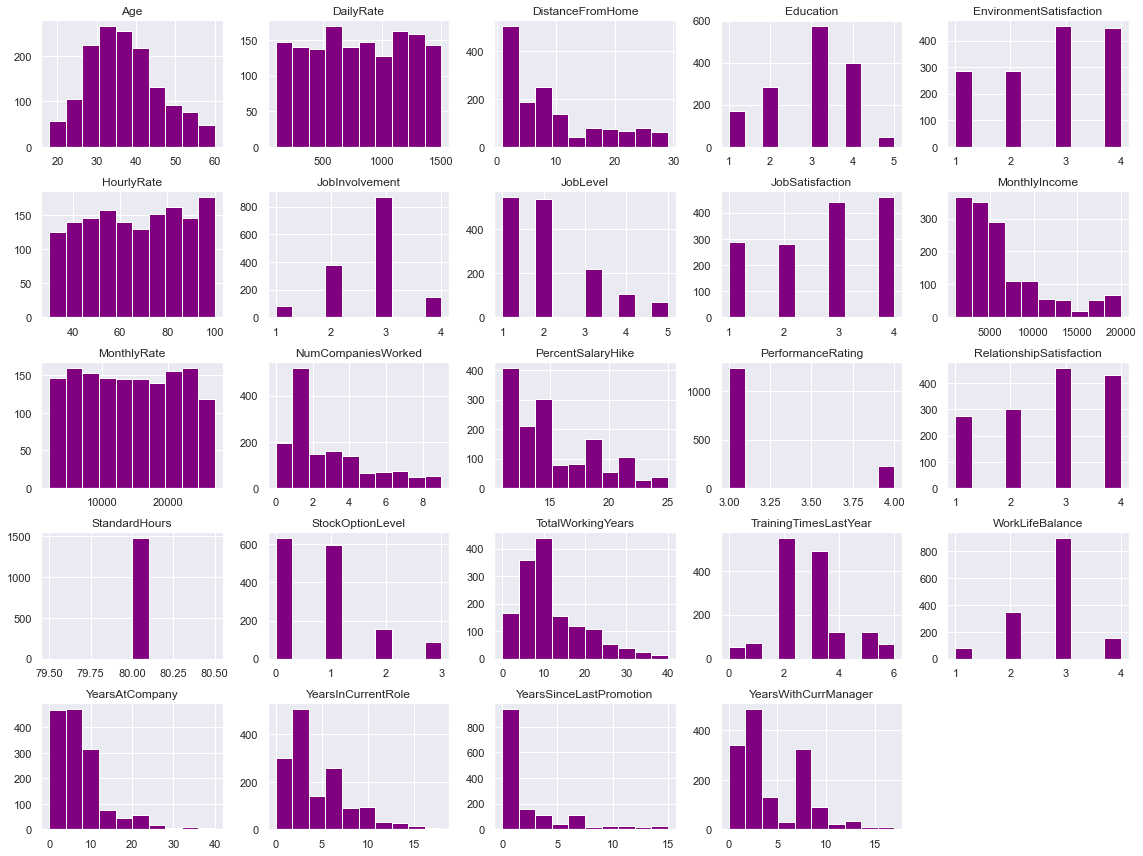

In [63]:
# Menampilkan histogram untuk setiap kolom
df.hist(figsize=(16, 12), color='purple')
plt.tight_layout()
plt.show()

1. Umur (Age): Distribusi umur karyawan menunjukkan bahwa jumlah karyawan cenderung lebih tinggi pada rentang umur 30 sampai 40 tahun.

2. Pendapatan Bulanan (MonthlyIncome): Histogram untuk pendapatan bulanan menunjukkan pola distribusi pendapatan karyawan kebanyakan berada pada angka di bawah 10.000

3. Skor Kepuasan Lingkungan Kerja (EnvironmentSatisfaction): Histogram ini memberikan informasi tentang distribusi skor kepuasan lingkungan kerja karyawan yang kebanyakan berada pada skor 3/puas kemudian diikuti dengan skor 4/sangat puas pada perusahaan

4. Skor Kepuasan Pekerjaan (JobSatisfaction): Histogram untuk skor kepuasan pekerjaan menunjukkan seberapa banyak karyawan yang merasa puas dengan pekerjaan mereka dengan skor 4 kemudian diikuti dengan skor 3.

5. Skor Kepuasan Hubungan (RelationshipSatisfaction): Histogram ini memberikan gambaran tentang tingkat kepuasan karyawan terhadap hubungan di tempat kerja yang kebanyakan memberi skor 3 kemudian diikuti dengan skor 4.

6. Jumlah Tahun Bekerja (TotalWorkingYears): Distribusi total tahun bekerja karyawan yang kebanyakan menumpuk di angka 15 tahun secara mayoritas

In [64]:
# nummerical columns 

num_cols = [] #Ini adalah inisialisasi list kosong untuk menyimpan nama-nama kolom dengan tipe data 'int64'

for i in df.columns: # Ini adalah loop for yang akan iterasi melalui setiap nama kolom dalam DataFrame
    if df[i].dtype == 'int64': #kondisi if yang akan memeriksa apakah tipe data dari kolom i adalah 'int64'
        num_cols.append(i) #Jika kolom i memiliki tipe data 'int64', maka nama kolom tersebut akan ditambahkan ke dalam list num_cols
        
print(num_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


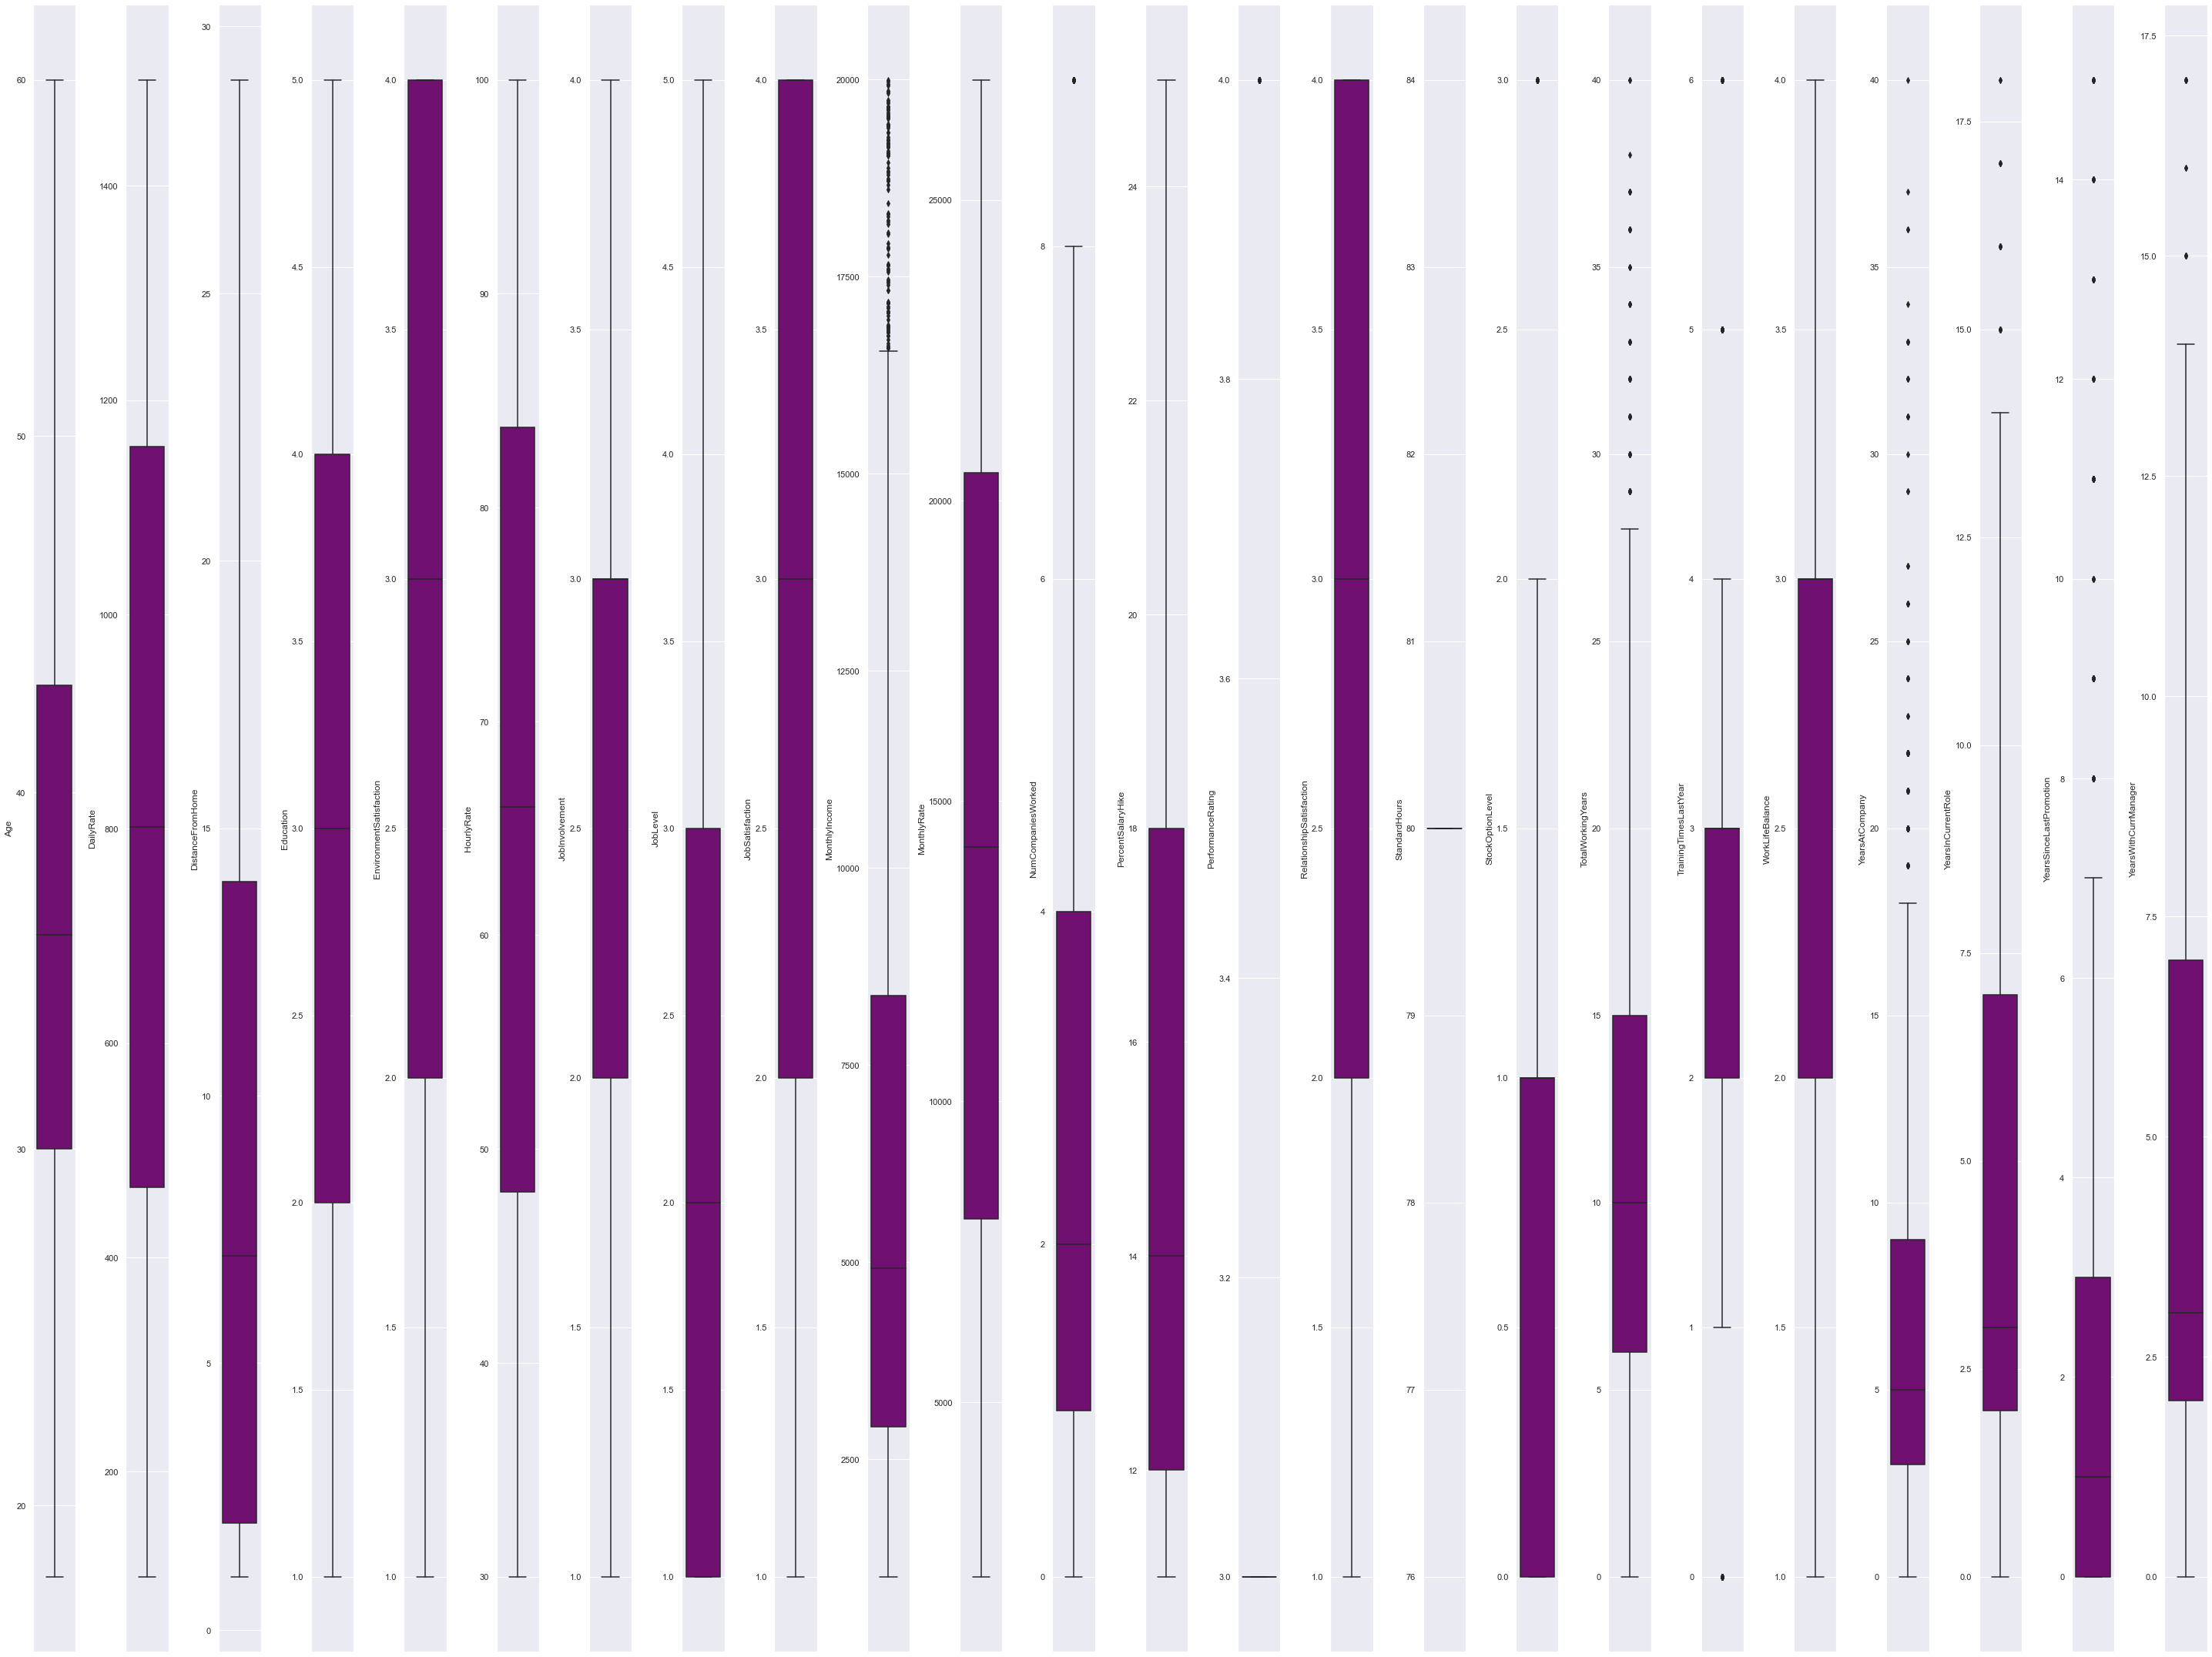

In [65]:
# Ukuran figure
plt.figure(figsize=(40, 30))

# List kolom numerik (num_cols) yang telah dibuat sebelumnya
features = num_cols

# Loop untuk membuat box plot untuk setiap kolom numerik
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)  # Subplot untuk setiap kolom
    sns.boxplot(y=df[features[i]], color='purple')  # Box plot untuk kolom tersebut
    plt.tight_layout()  # Agar tampilan lebih rapi

1. Age: Distribusi usia cenderung merata, dengan sebagian besar karyawan berada di kisaran usia 30 hingga 43 tahun.
2. DailyRate: Data gaji harian cenderung terdistribusi secara merata, namun ada beberapa pencilan (outliers) yang jauh dari nilai-nilai rata-rata.
3. DistanceFromHome: Sebagian besar karyawan tinggal dalam jarak relatif dekat dari tempat kerja, namun ada beberapa karyawan yang tinggal lebih jauh.
4. Education: Mayoritas karyawan memiliki tingkat pendidikan 2 (kira-kira setara dengan S1).
5. EnvironmentSatisfaction: Kepuasan karyawan terhadap lingkungan kerja cenderung rendah, dengan sebagian besar karyawan memberikan nilai 2 atau 3 pada skala kepuasan.
6. HourlyRate: Data tarif per jam cenderung terdistribusi merata, dengan beberapa pencilan (outliers) yang jauh dari nilai-nilai rata-rata.
7. JobInvolvement: Tingkat keterlibatan pekerjaan karyawan cenderung rata-rata, dengan mayoritas memberikan nilai 2 atau 3 pada skala keterlibatan.
8. JobLevel: Mayoritas karyawan berada di tingkat pekerjaan 1 atau 2, dengan sebagian kecil di tingkat 3, 4, atau 5.
9. JobSatisfaction: Mayoritas karyawan memiliki tingkat kepuasan pekerjaan yang rata-rata, dengan sebagian kecil yang memberikan nilai tinggi pada skala kepuasan.
10. MonthlyIncome: Distribusi pendapatan bulanan karyawan cenderung merata, namun terdapat beberapa pencilan (outliers) dengan pendapatan yang jauh lebih tinggi.
11. MonthlyRate: Data tingkat gaji bulanan cenderung terdistribusi merata, namun terdapat beberapa pencilan (outliers) yang jauh dari nilai-nilai rata-rata.
12. NumCompaniesWorked: Sebagian besar karyawan telah bekerja di dua atau tiga perusahaan sebelumnya sebelum bergabung dengan perusahaan saat ini.
13. PercentSalaryHike: Peningkatan gaji karyawan cenderung berkisar antara 11% hingga 18%.
14. PerformanceRating: Mayoritas karyawan mendapatkan nilai kinerja 3, dengan beberapa karyawan mendapatkan nilai 4.
15. RelationshipSatisfaction: Tingkat kepuasan hubungan kerja cenderung rata-rata, dengan mayoritas karyawan memberikan nilai 2 atau 3 pada skala kepuasan.
16. StandardHours: Standar jam kerja semua karyawan adalah 80 jam.
17. StockOptionLevel: Mayoritas karyawan memiliki tingkat opsi saham 0 atau 1, dengan sebagian kecil yang memiliki tingkat 2 atau 3.
18. TotalWorkingYears: Sebagian besar karyawan memiliki total tahun kerja antara 6 hingga 15 tahun.
19. TrainingTimesLastYear: Mayoritas karyawan mendapatkan pelatihan sebanyak 2 atau 3 kali dalam setahun.
20. WorkLifeBalance: Keseimbangan antara kehidupan kerja dan kehidupan pribadi cenderung rata-rata, dengan sebagian besar karyawan memberikan nilai 2 atau 3 pada skala keseimbangan.
21. YearsAtCompany: Mayoritas karyawan telah bekerja di perusahaan ini selama 3 hingga 9 tahun.
22. YearsInCurrentRole: Sebagian besar karyawan telah berada di peran pekerjaan saat ini selama 2 hingga 7 tahun.
23. YearsSinceLastPromotion: Sebagian besar karyawan telah mengalami kenaikan jabatan sekitar 1 hingga 3 tahun yang lalu.
24. YearsWithCurrManager: Mayoritas karyawan telah bekerja dengan manajer saat ini selama 2 hingga 7 tahun.

### Identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom

In [66]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Menghitung IQR (Interquartile Range)
iqr = q3 - q1

# Menghitung upper whisker dan lower whisker
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

# Menampilkan upper whisker dan lower whisker
for column in num_cols:
    upper = upper_whisker[column]
    lower = lower_whisker[column]
    print(f"Kolom {column}: Upper Whisker = {upper}, Lower Whisker = {lower}")

Kolom Age: Upper Whisker = 62.5, Lower Whisker = 10.5
Kolom DailyRate: Upper Whisker = 2195.0, Lower Whisker = -573.0
Kolom DistanceFromHome: Upper Whisker = 32.0, Lower Whisker = -16.0
Kolom Education: Upper Whisker = 7.0, Lower Whisker = -1.0
Kolom EnvironmentSatisfaction: Upper Whisker = 7.0, Lower Whisker = -1.0
Kolom HourlyRate: Upper Whisker = 137.375, Lower Whisker = -5.625
Kolom JobInvolvement: Upper Whisker = 4.5, Lower Whisker = 0.5
Kolom JobLevel: Upper Whisker = 6.0, Lower Whisker = -2.0
Kolom JobSatisfaction: Upper Whisker = 7.0, Lower Whisker = -1.0
Kolom MonthlyIncome: Upper Whisker = 16581.0, Lower Whisker = -5291.0
Kolom MonthlyRate: Upper Whisker = 39083.25, Lower Whisker = -10574.75
Kolom NumCompaniesWorked: Upper Whisker = 8.5, Lower Whisker = -3.5
Kolom PercentSalaryHike: Upper Whisker = 27.0, Lower Whisker = 3.0
Kolom PerformanceRating: Upper Whisker = 3.0, Lower Whisker = 3.0
Kolom RelationshipSatisfaction: Upper Whisker = 7.0, Lower Whisker = -1.0
Kolom Standard

### Hitung count, proportion, dan list dari outlier tiap kolom

In [67]:
# Menghitung nilai quartile (q1, q2, q3) dan IQR untuk setiap kolom
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Menghitung batas atas (upper whisker) dan batas bawah (lower whisker)
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

# Mengidentifikasi outlier untuk setiap kolom
outliers = {}
for col in num_cols:
    col_outliers = df[(df[col] < lower_whisker[col]) | (df[col] > upper_whisker[col])]
    outliers[col] = {
        'count': col_outliers.shape[0],
        'proportion': col_outliers.shape[0] / df.shape[0],
        'values': col_outliers[col].tolist()
    }

# Menampilkan hasil
for col, info in outliers.items():
    print("Kolom:", col)
    print("Jumlah outlier:", info['count'])
    print("Proporsi outlier:", info['proportion'])
    print("Nilai outlier:", info['values'])
    print()

Kolom: Age
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: DailyRate
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: DistanceFromHome
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: Education
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: EnvironmentSatisfaction
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: HourlyRate
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: JobInvolvement
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: JobLevel
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: JobSatisfaction
Jumlah outlier: 0
Proporsi outlier: 0.0
Nilai outlier: []

Kolom: MonthlyIncome
Jumlah outlier: 114
Proporsi outlier: 0.07755102040816327
Nilai outlier: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300,

Berdasarkan hasil hitungan outlier pada kolom diatas hal tersebut sesuai dengan hasil visualisasi pada boxplot bahwa ada 10 kolom yang terindikasi memiliki outlier.

### Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom
    b. daftar kategori unik dan frekuensinya untuk tiap kolom

### Countplot untuk tiap kolom<p>

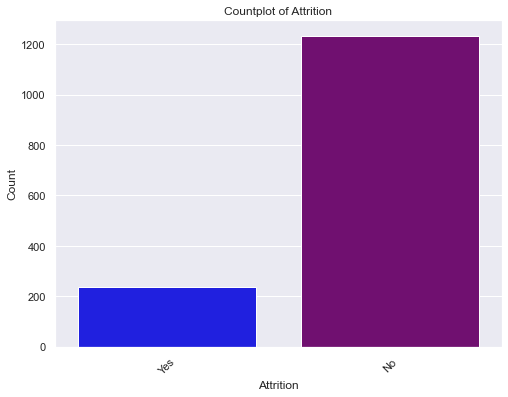

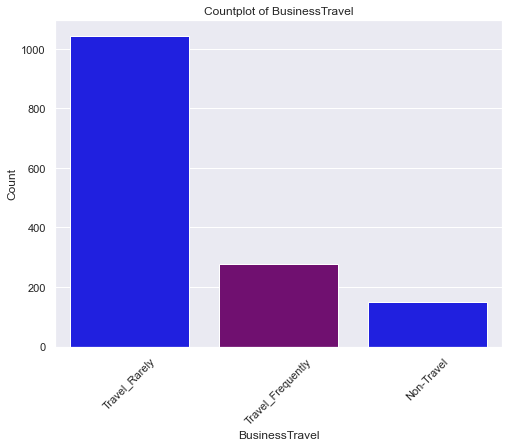

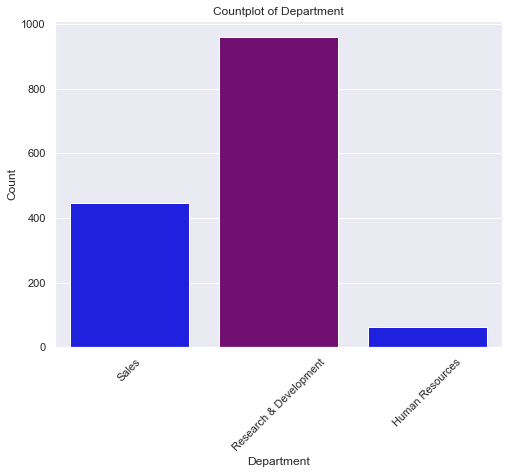

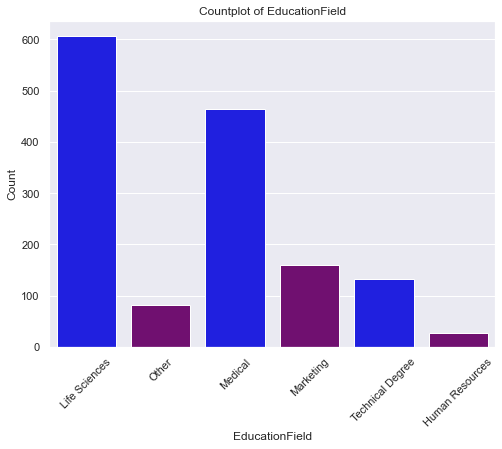

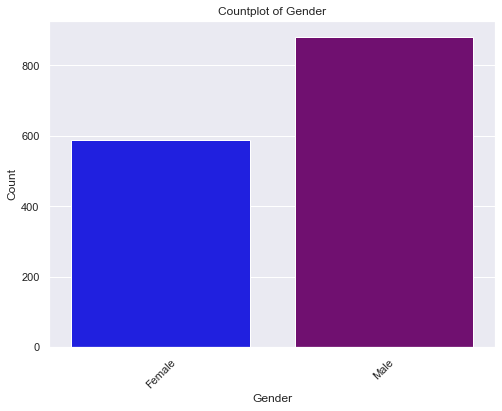

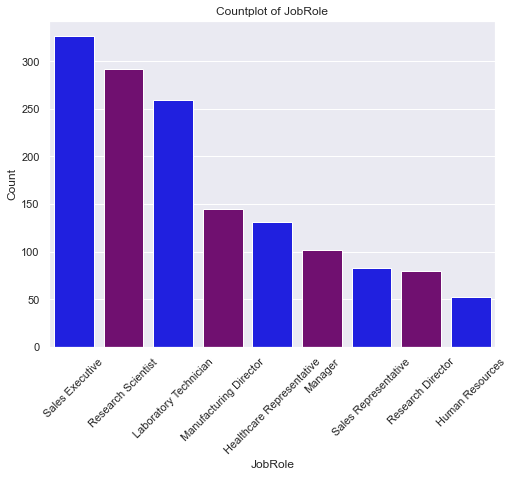

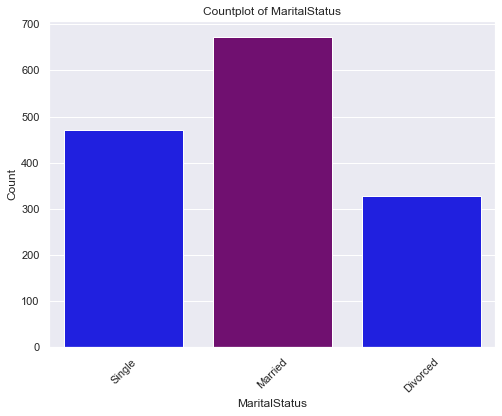

In [68]:
# Daftar kolom kategorikal
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Visualisasi countplot dengan warna biru dan ungu
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=col, data=df, palette=['blue', 'purple'])
    ax.set_title(f'Countplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

1. Attrition: Grafik menunjukkan jumlah karyawan yang "Stay" (tidak mengundurkan diri) lebih banyak daripada jumlah karyawan yang "Attrition" (mengundurkan diri). Ini menunjukkan bahwa sebagian besar karyawan cenderung bertahan di perusahaan.

2. BusinessTravel: Sebagian besar karyawan melakukan perjalanan bisnis dengan frekuensi "Travel_Rarely" (jarang melakukan perjalanan bisnis).

3. Department: Jumlah karyawan yang paling banyak berada di departemen "Research & Development".

4. EducationField: Mayoritas karyawan memiliki latar belakang pendidikan di bidang "Life Sciences" dan "Medical".

5. Gender: Jumlah karyawan pria dan wanita relatif seimbang.

6. JobRole: Posisi pekerjaan "Sales Executive" merupakan posisi dengan jumlah karyawan terbanyak, diikuti oleh "Research Scientist" dan "Laboratory Technician".

7. MaritalStatus: Mayoritas karyawan adalah "Married" (menikah), diikuti oleh "Single" (belum menikah).

### Daftar kategori unik dan frekuensinya untuk tiap kolom<p>

In [69]:
# Daftar kategori unik dan frekuensi tiap kolom
for col in categorical_columns: #terasi dilakukan untuk setiap kolom kategorikal yang ada dalam list categorical_columns.
    unique_categories = df[col].unique() # Mengambil semua nilai unik yang ada dalam kolom tersebut dan menyimpannya dalam variabel unique_categories.
    frequencies = df[col].value_counts() # Menghitung frekuensi masing-masing nilai dalam kolom kategorikal dan menyimpannya
    print(f'Unique Categories and Frequencies for {col}:') #Mencetak judul kolom kategorikal saat ini.
    for category in unique_categories: #Untuk setiap kategori unik yang ada dalam kolom tersebut
        frequency = frequencies[category] #Mengambil frekuensi kategori saat ini dari variabel frequencies.
        print(f'{category}: {frequency}') #Mencetak kategori dan frekuensinya.
    print()

Unique Categories and Frequencies for Attrition:
Yes: 237
No: 1233

Unique Categories and Frequencies for BusinessTravel:
Travel_Rarely: 1043
Travel_Frequently: 277
Non-Travel: 150

Unique Categories and Frequencies for Department:
Sales: 446
Research & Development: 961
Human Resources: 63

Unique Categories and Frequencies for EducationField:
Life Sciences: 606
Other: 82
Medical: 464
Marketing: 159
Technical Degree: 132
Human Resources: 27

Unique Categories and Frequencies for Gender:
Female: 588
Male: 882

Unique Categories and Frequencies for JobRole:
Sales Executive: 326
Research Scientist: 292
Laboratory Technician: 259
Manufacturing Director: 145
Healthcare Representative: 131
Manager: 102
Sales Representative: 83
Research Director: 80
Human Resources: 52

Unique Categories and Frequencies for MaritalStatus:
Single: 470
Married: 673
Divorced: 327



1. Attrition : Kebanyakan karyawan yang memilih untuk tetap bekerja pada berusahaan dengan jumlah No = 2466 karyawan. Dan sebagian karyawan memilih untuk berhenti bekerja di perusahaan dengan jumlah Yes = 474 karaywan 

2. Business Travel : Kebanyakan Karyawan sangat jarang melakukan perjalanan bisnis dengan jumlah Travel Rarely 2086

3. Development : Kebanyakan karyawan yang bekerja di departemen Reseacrh and Development sekitar 1922 karyawan kemudian diikuti dengan sales sebanyak 892 karyawan dan Human Resource sebanyak 126 karyawan

4. Education Field : Background pendidikan kebanyakan karyawan yang bekerja di perusahaan adalah Life Science sebayak 1212 kasryawan kemudian diikuti dengan medical sebanyak 928 karyawan dan Marketing sebanyak 318 karyawan.

5. Gender : Jumlah gender yang bekerja diperusahaan kebanyakan laki-laki sebanyak 1764 karyawan dan perempuan sebanyak 1176 karyawan.

6. Marital Status : Kebanyakan karyawan yang bekerja di perusahaan dengan status pernikahan Married sekitar 1346 karyawann, single 940 karyawan dan yang divorced sebanyak 654 karyawan 

In [70]:
# Menentukan kategori dengan frekuensi tertinggi dan terendah
for col in categorical_columns:
    frequencies = df[col].value_counts()
    highest_freq_category = frequencies.idxmax()
    lowest_freq_category = frequencies.idxmin()
    print(f'Highest Frequency Category for {col}: {highest_freq_category} ({frequencies[highest_freq_category]} occurrences)')
    print(f'Lowest Frequency Category for {col}: {lowest_freq_category} ({frequencies[lowest_freq_category]} occurrences)')
    print()

Highest Frequency Category for Attrition: No (1233 occurrences)
Lowest Frequency Category for Attrition: Yes (237 occurrences)

Highest Frequency Category for BusinessTravel: Travel_Rarely (1043 occurrences)
Lowest Frequency Category for BusinessTravel: Non-Travel (150 occurrences)

Highest Frequency Category for Department: Research & Development (961 occurrences)
Lowest Frequency Category for Department: Human Resources (63 occurrences)

Highest Frequency Category for EducationField: Life Sciences (606 occurrences)
Lowest Frequency Category for EducationField: Human Resources (27 occurrences)

Highest Frequency Category for Gender: Male (882 occurrences)
Lowest Frequency Category for Gender: Female (588 occurrences)

Highest Frequency Category for JobRole: Sales Executive (326 occurrences)
Lowest Frequency Category for JobRole: Human Resources (52 occurrences)

Highest Frequency Category for MaritalStatus: Married (673 occurrences)
Lowest Frequency Category for MaritalStatus: Divorce

In [71]:
# Mengidentifikasi kecenderungan atau pola dalam distribusi kategori
for col in categorical_columns:
    category_counts = df[col].value_counts()
    total_categories = len(category_counts)
    dominant_category = category_counts.idxmax()
    dominant_category_count = category_counts.max()
    category_proportion = dominant_category_count / df.shape[0]
    
    print(f'Column: {col}')
    print(f'Total Categories: {total_categories}')
    print(f'Dominant Category: {dominant_category} ({dominant_category_count} occurrences)')
    print(f'Proportion of Dominant Category: {category_proportion:.2%}')
    print('------------------------------------')


Column: Attrition
Total Categories: 2
Dominant Category: No (1233 occurrences)
Proportion of Dominant Category: 83.88%
------------------------------------
Column: BusinessTravel
Total Categories: 3
Dominant Category: Travel_Rarely (1043 occurrences)
Proportion of Dominant Category: 70.95%
------------------------------------
Column: Department
Total Categories: 3
Dominant Category: Research & Development (961 occurrences)
Proportion of Dominant Category: 65.37%
------------------------------------
Column: EducationField
Total Categories: 6
Dominant Category: Life Sciences (606 occurrences)
Proportion of Dominant Category: 41.22%
------------------------------------
Column: Gender
Total Categories: 2
Dominant Category: Male (882 occurrences)
Proportion of Dominant Category: 60.00%
------------------------------------
Column: JobRole
Total Categories: 9
Dominant Category: Sales Executive (326 occurrences)
Proportion of Dominant Category: 22.18%
------------------------------------
Colum

1. Kolom 'Attrition':

Terdapat 2 kategori pada kolom ini, yaitu 'Yes' dan 'No'.
Kategori dominan adalah 'No' dengan 2466 data, yang merupakan 83.88% dari seluruh data pada kolom ini.

2. Kolom 'BusinessTravel':

Terdapat 3 kategori pada kolom ini, yaitu 'Travel_Rarely', 'Travel_Frequently', dan 'Non-Travel'.
Kategori dominan adalah 'Travel_Rarely' dengan 2086 data, yang merupakan 70.95% dari seluruh data pada kolom ini.

3. Kolom 'Department':

Terdapat 3 kategori pada kolom ini, yaitu 'Research & Development', 'Sales', dan 'Human Resources'.
Kategori dominan adalah 'Research & Development' dengan 1922 data, yang merupakan 65.37% dari seluruh data pada kolom ini.

4. Kolom 'EducationField':

Terdapat 6 kategori pada kolom ini, yaitu 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', dan 'Human Resources'.
Kategori dominan adalah 'Life Sciences' dengan 1212 data, yang merupakan 41.22% dari seluruh data pada kolom ini.

5. Kolom 'Gender':

Terdapat 2 kategori pada kolom ini, yaitu 'Male' dan 'Female'.
Kategori dominan adalah 'Male' dengan 1764 data, yang merupakan 60.00% dari seluruh data pada kolom ini.

6. Kolom 'JobRole':

Terdapat 9 kategori pada kolom ini, yaitu 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', dan 'Human Resources'.
Kategori dominan adalah 'Sales Executive' dengan 652 data, yang merupakan 22.18% dari seluruh data pada kolom ini.

7. Kolom 'MaritalStatus':

Terdapat 3 kategori pada kolom ini, yaitu 'Married', 'Single', dan 'Divorced'.
Kategori dominan adalah 'Married' dengan 1346 data, yang merupakan 45.78% dari seluruh data pada kolom ini.1.

### Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:
    a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)
    b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

### Boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)<p>

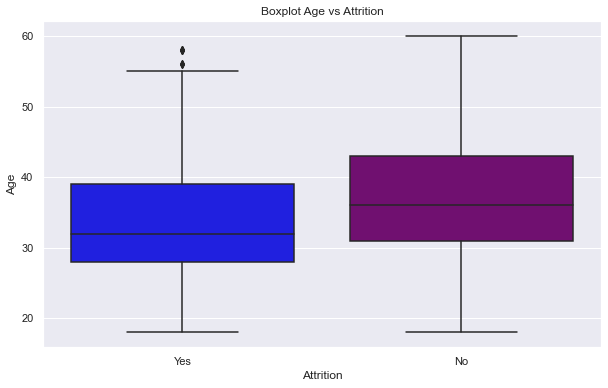

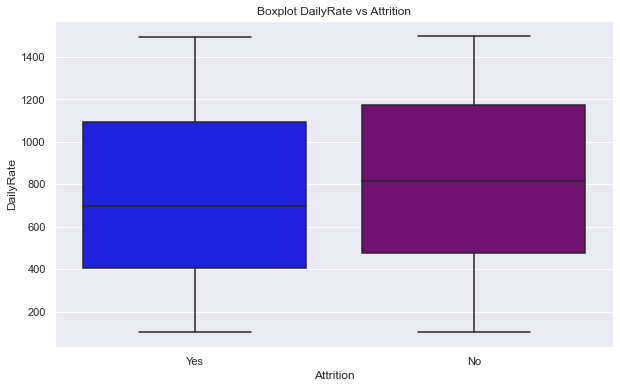

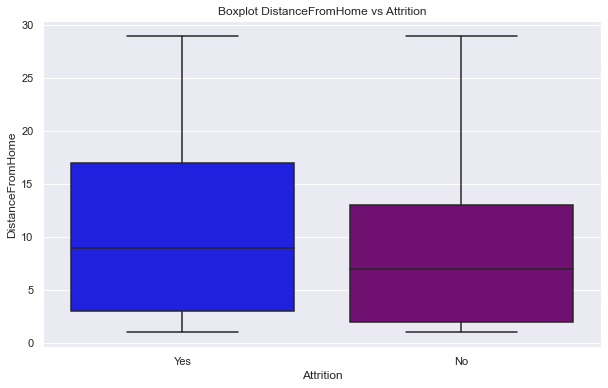

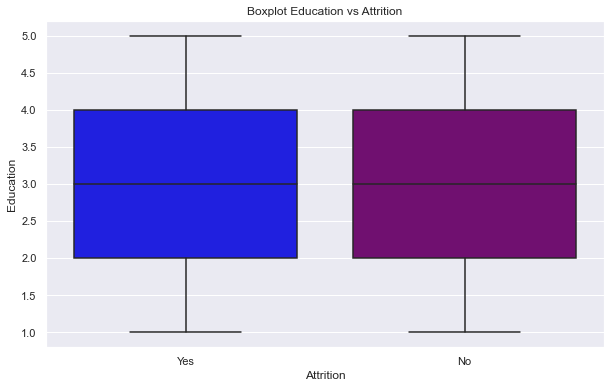

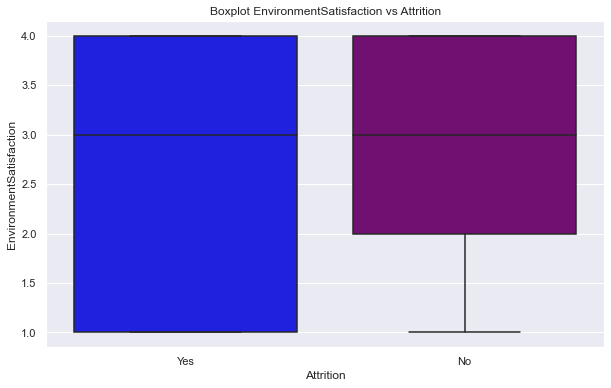

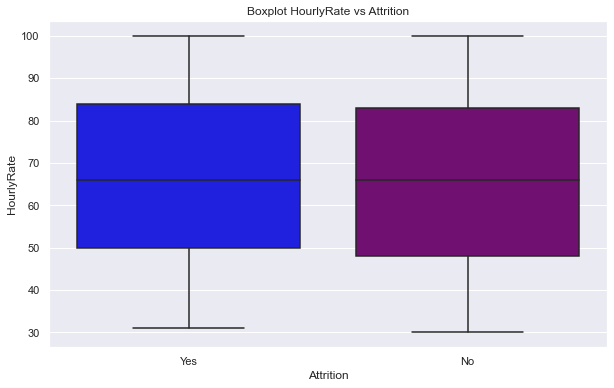

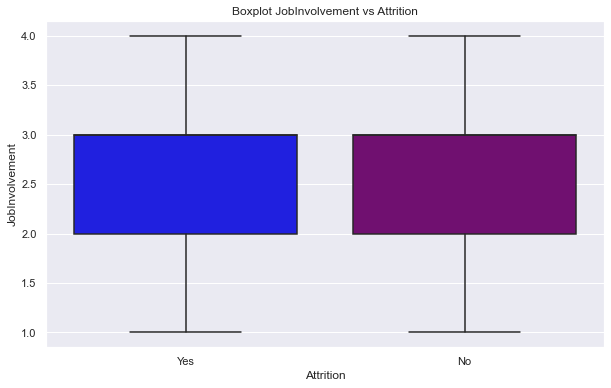

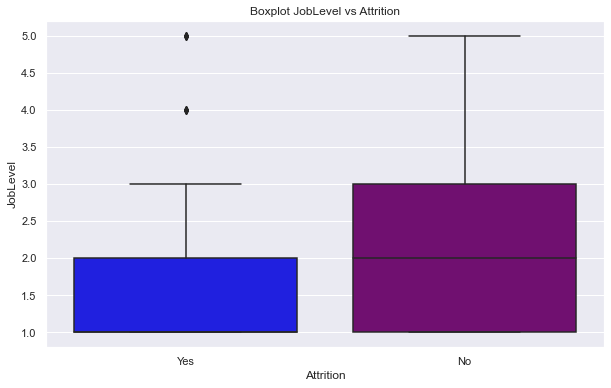

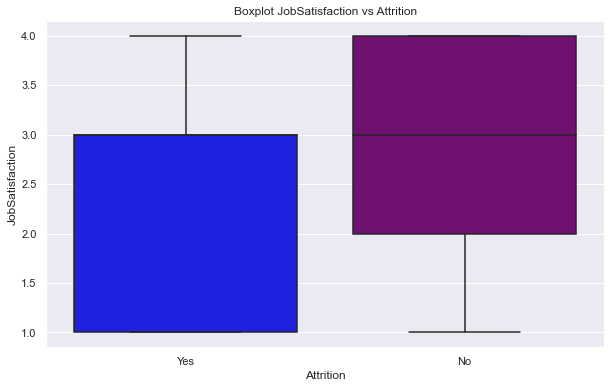

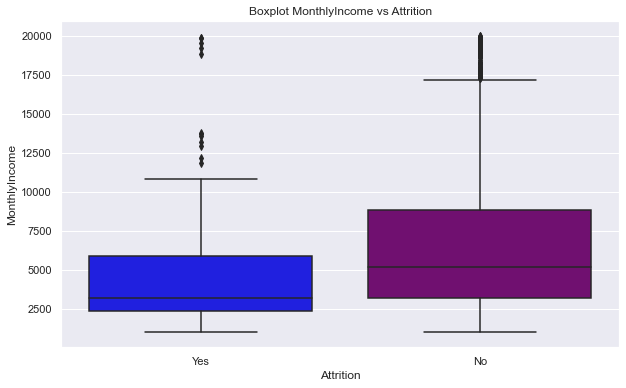

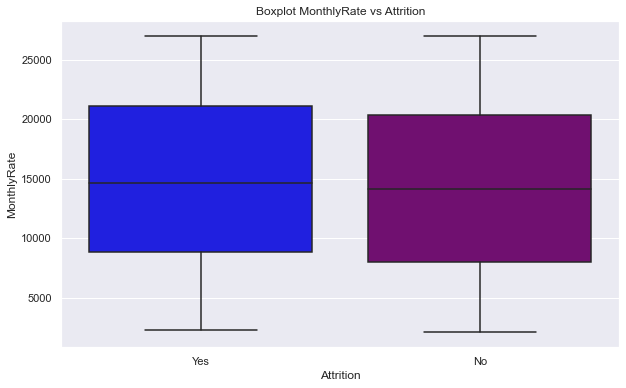

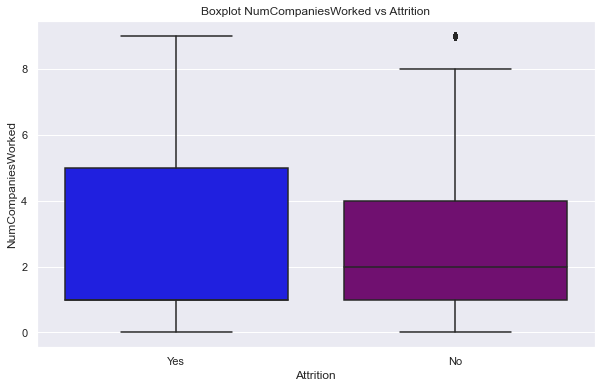

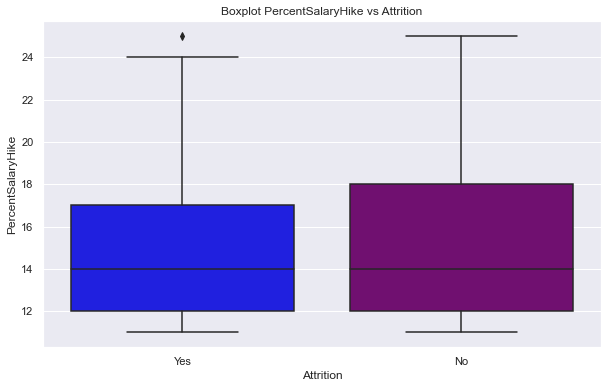

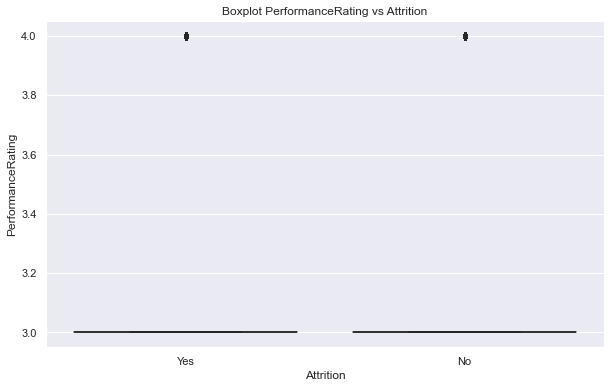

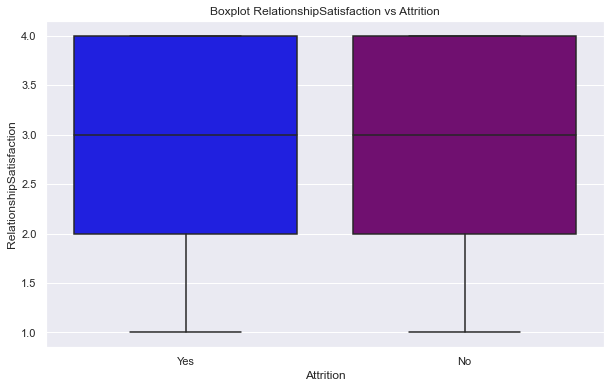

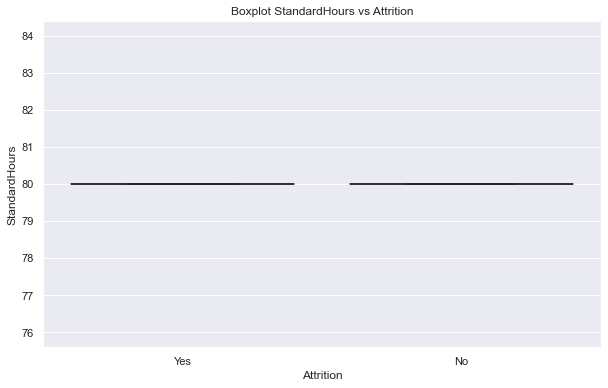

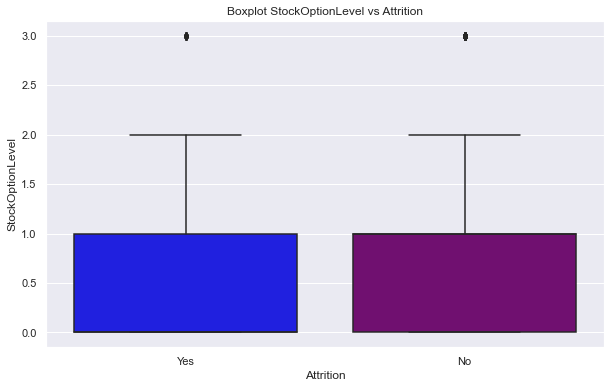

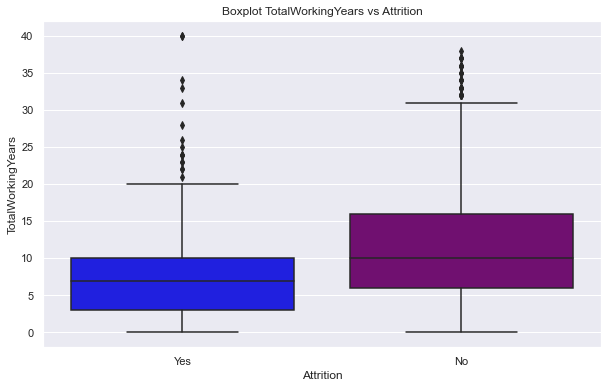

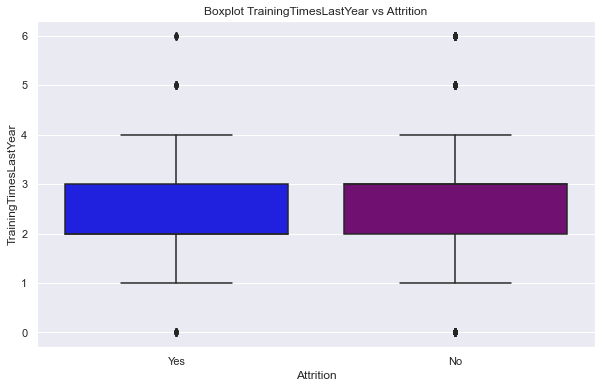

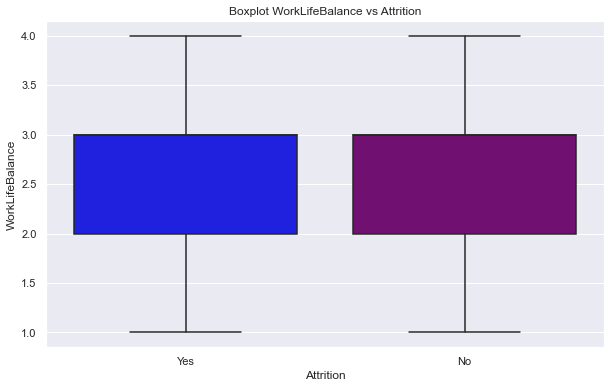

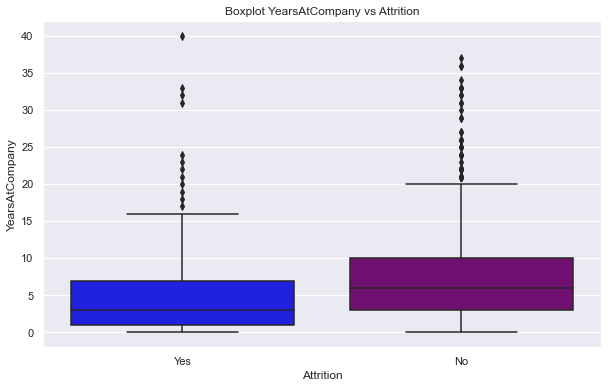

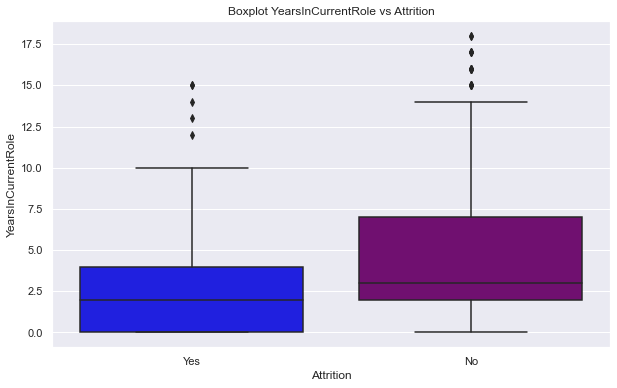

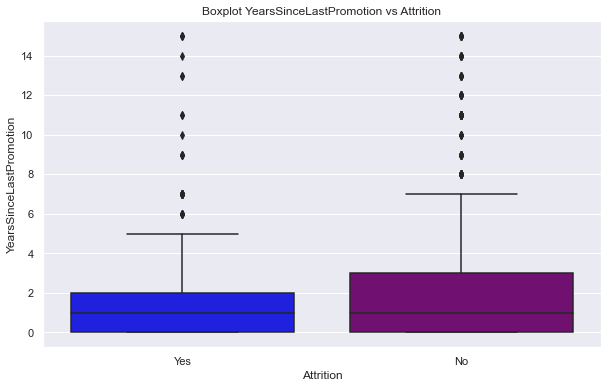

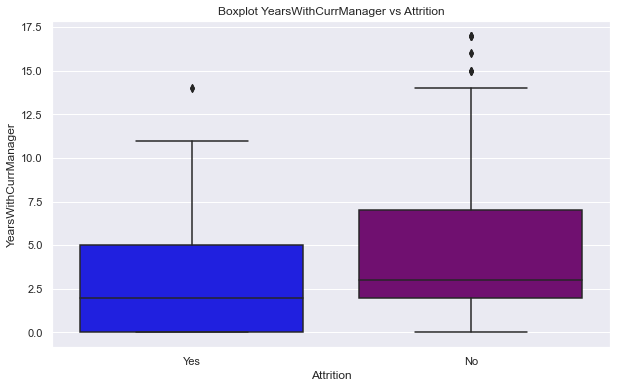

In [72]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y=col, data=df, palette=['blue', 'purple'])
    plt.title(f'Boxplot {col} vs Attrition')
    plt.show()

1. Pendapatan Bulanan (MonthlyIncome): Jika terdapat perbedaan yang signifikan dalam distribusi pendapatan bulanan antara karyawan yang berhenti (attrition) dan yang tidak, ini dapat menunjukkan bahwa tingkat gaji dapat menjadi faktor yang mempengaruhi keputusan karyawan untuk berhenti atau tetap bekerja.

2. Umur (Age): Perbedaan distribusi umur antara karyawan yang attrition dan non-attrition dapat memberikan wawasan tentang bagaimana usia karyawan dapat mempengaruhi keputusan mereka untuk berhenti atau tetap bekerja di perusahaan.

3. Jumlah Perusahaan yang Pernah Dikerjakan (NumCompaniesWorked): Jika terdapat perbedaan yang signifikan dalam jumlah perusahaan yang pernah dikerjakan antara kedua kelompok, ini bisa menunjukkan bahwa pengalaman kerja atau kestabilan karier dapat berperan dalam keputusan karyawan untuk berpindah pekerjaan.

4. Skor Kepuasan Lingkungan Kerja (EnvironmentSatisfaction): Perbedaan distribusi skor kepuasan lingkungan kerja antara kedua kelompok dapat menunjukkan sejauh mana kepuasan karyawan dengan lingkungan kerja dapat mempengaruhi keputusan mereka untuk berhenti atau tetap bekerja.

5. Total Tahun Bekerja (TotalWorkingYears): Jika terdapat perbedaan yang signifikan dalam total tahun bekerja antara karyawan yang attrition dan non-attrition, ini dapat memberikan wawasan tentang bagaimana masa kerja karyawan dapat mempengaruhi keputusan mereka untuk berhenti.

6. Jumlah Pelatihan yang Diterima dalam Setahun (TrainingTimesLastYear): Jika terdapat perbedaan yang signifikan dalam jumlah pelatihan yang diterima karyawan antara kedua kelompok, ini bisa menunjukkan bagaimana pelatihan dan pengembangan karyawan dapat berperan dalam retensi dan attrition.

7. Keseimbangan Kerja dan Kehidupan (WorkLifeBalance): Perbedaan distribusi skor keseimbangan kerja dan kehidupan antara kedua kelompok dapat menunjukkan bagaimana keseimbangan kehidupan kerja dapat mempengaruhi keputusan karyawan untuk berhenti.

### Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:<p>

    a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue
    b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut)

### Countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue <p>

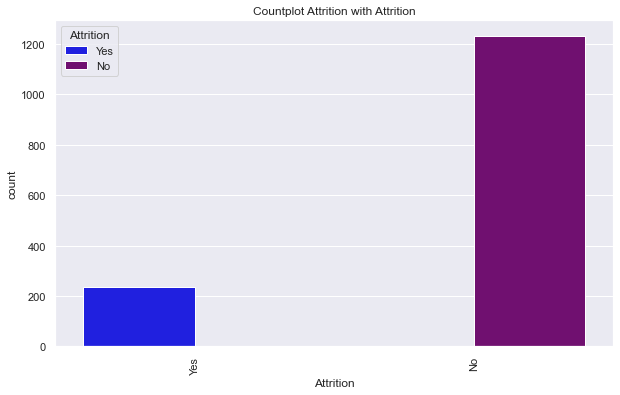

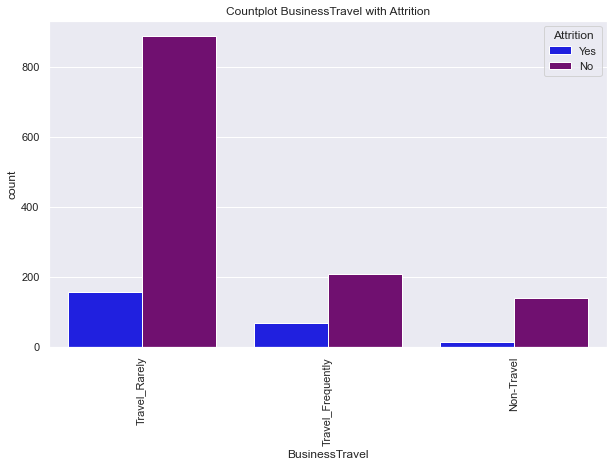

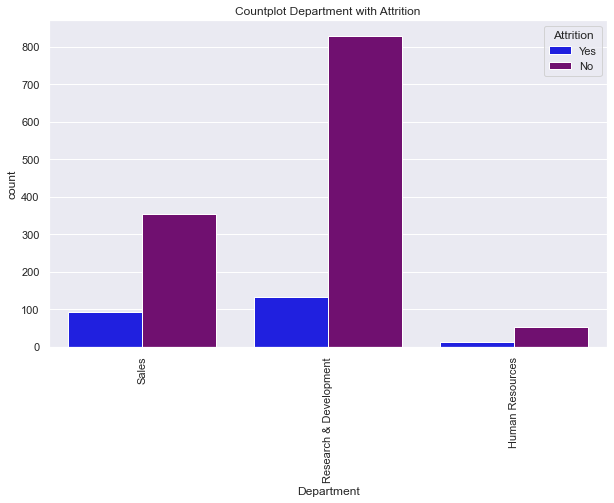

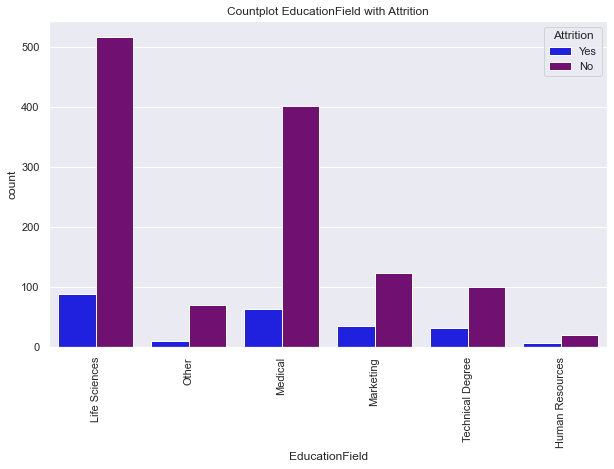

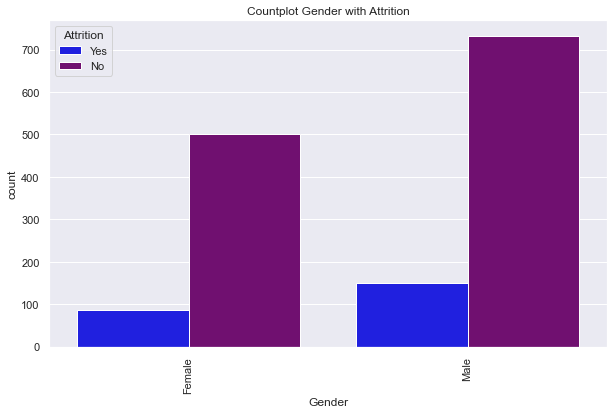

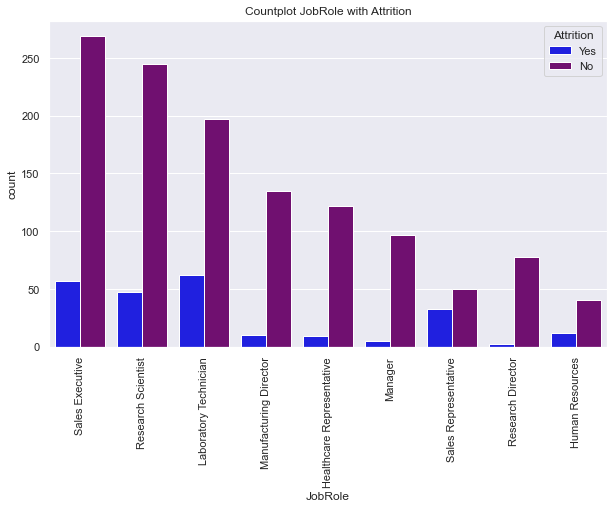

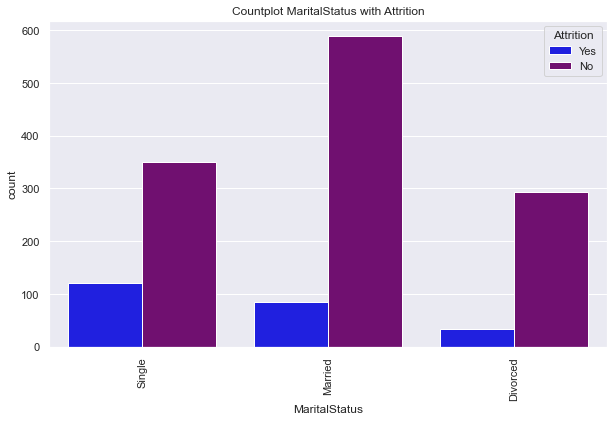

In [73]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, hue='Attrition', palette=['blue', 'purple'])
    plt.title(f'Countplot {col} with Attrition')
    plt.xticks(rotation=90)
    plt.show()

1. Kolom 'Attrition' dengan Kategori 'No': Frekuensi karyawan yang tidak mengundurkan diri (No Attrition) lebih tinggi daripada frekuensi karyawan yang mengundurkan diri (Yes Attrition) dalam dataset.

2. Kolom 'BusinessTravel': Mayoritas karyawan melakukan perjalanan bisnis dalam kategori 'Travel_Rarely', diikuti oleh 'Travel_Frequently' dan 'Non-Travel'. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) terlihat lebih tinggi di kategori 'Travel_Frequently' dibandingkan dengan kategori lainnya.

3. Kolom 'Department': Mayoritas karyawan bekerja di departemen 'Research & Development', diikuti oleh 'Sales' dan 'Human Resources'. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) terlihat lebih tinggi di departemen 'Sales' dibandingkan dengan departemen lainnya.

4. Kolom 'EducationField': Mayoritas karyawan memiliki latar belakang pendidikan di bidang 'Life Sciences', diikuti oleh 'Medical', 'Marketing', dan lainnya. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) lebih tinggi di bidang 'Human Resources' dibandingkan dengan bidang lainnya.

5. Kolom 'Gender': Jumlah karyawan pria dan wanita dalam dataset hampir seimbang. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) hampir serupa di kedua kelompok jenis kelamin.

6. Kolom 'JobRole': Karyawan yang memiliki peran 'Sales Executive' adalah yang paling dominan dalam dataset, diikuti oleh peran lainnya. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) lebih tinggi di beberapa peran pekerjaan seperti 
'Laboratory Technician', 'Sales Representative', dan 'Research Scientist'.

7. Kolom 'MaritalStatus': Mayoritas karyawan adalah berstatus 'Married', diikuti oleh 'Single' dan 'Divorced'. Frekuensi karyawan yang mengundurkan diri (Yes Attrition) lebih tinggi di kategori 'Single' dan 'Divorced' dibandingkan dengan kategori 'Married'.

## Rekomendasi 

Perusahaan perlu memperhatikan faktor-faktor yang mempengaruhi tingkat attrition, seperti kepuasan kerja, kesempatan pengembangan karir, dan keseimbangan kehidupan kerja. Langkah-langkah perbaikan dapat meliputi program penghargaan dan pengakuan, peluang pelatihan dan pengembangan, serta kebijakan fleksibilitas kerja.

Perusahaan harus memperhatikan karyawan yang melakukan perjalanan bisnis secara frekuensi tinggi. Upaya dapat dilakukan untuk meningkatkan kenyamanan dan kepuasan kerja mereka, seperti memperbaiki fasilitas perjalanan dan memberikan insentif khusus.

Departemen 'Sales' perlu diperhatikan lebih dalam untuk mengidentifikasi masalah yang mungkin menyebabkan tingkat attrition yang tinggi. Evaluasi kondisi kerja, kompensasi, dan peluang pengembangan karir di departemen tersebut dapat membantu meningkatkan retensi karyawan.

Perusahaan perlu menganalisis penyebab tingginya tingkat attrition di bidang 'Human Resources'. Mungkin diperlukan langkah-langkah untuk meningkatkan kepuasan dan kesejahteraan karyawan di bidang tersebut, seperti program pengembangan keterampilan dan peningkatan komunikasi internal.

Meskipun tidak ada perbedaan signifikan dalam tingkat attrition antara karyawan pria dan wanita, perusahaan harus tetap memastikan kesetaraan gender dalam hal kesempatan karir, kompensasi, dan lingkungan kerja yang inklusif.

Perusahaan harus memperhatikan peran pekerjaan dengan tingkat attrition yang tinggi, seperti 'Laboratory Technician', 'Sales Representative', dan 'Research Scientist'. Evaluasi tugas dan tanggung jawab, serta upaya meningkatkan kepuasan dan pengembangan karir dalam peran-pekerjaan tersebut dapat membantu mengurangi attrition.

Diperlukan perhatian khusus terhadap karyawan yang berstatus 'Single' dan 'Divorced' karena mereka memiliki tingkat attrition yang lebih tinggi. Perusahaan dapat mempertimbangkan kebijakan yang mendukung karyawan dalam mencapai keseimbangan kehidupan kerja dan pribadi, serta program kesejahteraan yang relevan.

 ### Stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut) <p>

<Figure size 720x432 with 0 Axes>

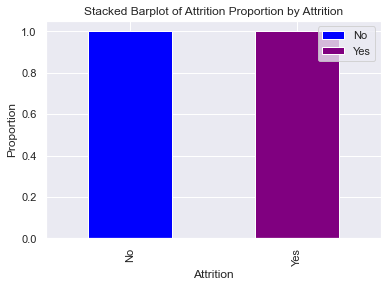

<Figure size 720x432 with 0 Axes>

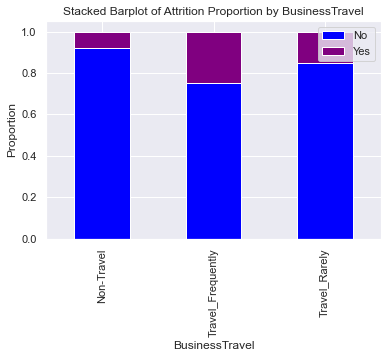

<Figure size 720x432 with 0 Axes>

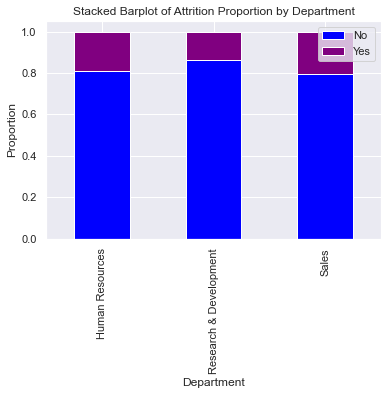

<Figure size 720x432 with 0 Axes>

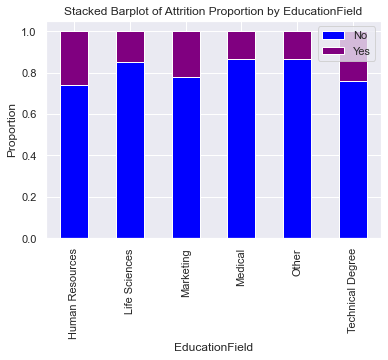

<Figure size 720x432 with 0 Axes>

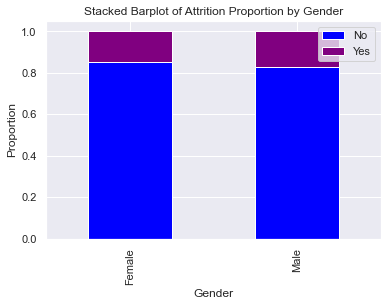

<Figure size 720x432 with 0 Axes>

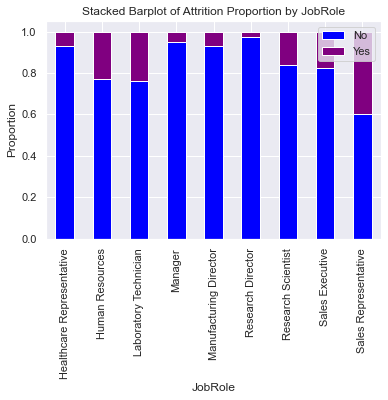

<Figure size 720x432 with 0 Axes>

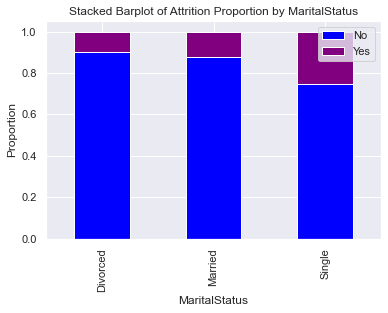

In [74]:
# Stacked barplot proporsi 'Attrition' untuk masing-masing kategori pada kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    prop_df = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack()
    prop_df.plot(kind='bar', stacked=True, color=['blue', 'purple'])
    plt.title(f'Stacked Barplot of Attrition Proportion by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)
    plt.show()


1. Attrition berdasarkan BusinessTravel: Dari visualisasi ini, kita dapat melihat bahwa karyawan yang sering melakukan perjalanan bisnis (Travel_Frequently) memiliki tingkat attrition yang lebih tinggi dibandingkan dengan karyawan yang jarang melakukan perjalanan bisnis (Travel_Rarely). Sementara itu, karyawan yang tidak melakukan perjalanan bisnis (Non-Travel) memiliki tingkat attrition yang lebih rendah. Hal ini mungkin mengindikasikan bahwa karyawan lebih nyaman bekerja didalam perusahaan dibandingkan bekerja diluar perusahaan.

2. Attrition berdasarkan Department: Visualisasi ini menunjukkan bahwa ada perbedaan tingkat attrition yang signifikan di antara departemen-departemen dalam perusahaan. Beberapa departemen mungkin memiliki tingkat attrition yang lebih tinggi daripada yang lain, yang dapat menunjukkan masalah potensial yang perlu diatasi untuk mempertahankan karyawan.

3. Attrition berdasarkan EducationField: Dari visualisasi ini, kita dapat melihat bahwa beberapa bidang pendidikan memiliki tingkat attrition yang lebih tinggi daripada yang lain. Misalnya, karyawan dengan latar belakang pendidikan dalam bidang "Human Resources" mungkin memiliki tingkat attrition yang lebih tinggi dibandingkan dengan bidang pendidikan lainnya.

4. Attrition berdasarkan Gender: Visualisasi ini dapat membantu kita melihat perbedaan proporsi karyawan pria dan wanita yang mengalami attrition. Jika terdapat kesenjangan yang signifikan, hal ini dapat menunjukkan adanya isu tertentu yang harus ditangani dalam pengelolaan karyawan.

5. Attrition berdasarkan JobRole: Dari visualisasi ini, kita dapat melihat bahwa beberapa peran pekerjaan mungkin memiliki tingkat attrition yang lebih tinggi dibandingkan dengan yang lain. Hal ini dapat membantu perusahaan dalam mengidentifikasi peran pekerjaan yang mungkin memiliki tingkat perputaran karyawan yang tinggi dan mengambil langkah-langkah untuk meningkatkan retensi.

6. Attrition berdasarkan MaritalStatus: Visualisasi ini dapat membantu kita melihat seberapa besar perbedaan tingkat attrition di antara status perkawinan karyawan. Jika ada perbedaan yang signifikan, hal ini dapat memberikan wawasan tentang faktor-faktor yang mempengaruhi keputusan karyawan untuk berhenti.



## Rekomendasi

Attrition berdasarkan BusinessTravel: Dari visualisasi, terlihat bahwa karyawan yang sering melakukan perjalanan bisnis memiliki tingkat attrition yang lebih tinggi. Sementara itu, karyawan yang jarang atau tidak melakukan perjalanan bisnis memiliki tingkat attrition yang lebih rendah. Rekomendasi: Perusahaan perlu memperhatikan karyawan yang sering melakukan perjalanan bisnis dan mencari cara untuk meningkatkan retensi mereka, seperti memberikan insentif atau fasilitas yang membuat perjalanan bisnis lebih nyaman.

Attrition berdasarkan Department: Visualisasi menunjukkan perbedaan tingkat attrition yang signifikan antara departemen. Departemen dengan tingkat attrition tinggi perlu diperhatikan lebih lanjut untuk mengidentifikasi masalah yang mungkin ada. Rekomendasi: Perusahaan perlu menganalisis penyebab attrition yang tinggi di departemen tertentu dan mengambil tindakan yang tepat, seperti meningkatkan kondisi kerja atau memberikan peluang pengembangan karir yang lebih baik.

Attrition berdasarkan EducationField: Beberapa bidang pendidikan memiliki tingkat attrition yang lebih tinggi. Karyawan dengan latar belakang pendidikan dalam bidang tertentu, seperti "Human Resources", cenderung memiliki tingkat attrition yang lebih tinggi. Rekomendasi: Perusahaan dapat mempertimbangkan strategi retensi yang lebih khusus untuk karyawan dengan latar belakang pendidikan dalam bidang-bidang yang memiliki tingkat attrition tinggi, seperti memberikan pelatihan atau pengembangan karir yang relevan.

Attrition berdasarkan Gender: Visualisasi ini membantu mengidentifikasi perbedaan proporsi attrition antara karyawan pria dan wanita. Jika ada kesenjangan yang signifikan, perusahaan perlu memperhatikan faktor-faktor yang mungkin mempengaruhi keputusan karyawan untuk berhenti, seperti kesenjangan gaji atau kurangnya keadilan dalam kesempatan promosi. Rekomendasi: Perusahaan harus melakukan evaluasi untuk memastikan kesetaraan gender dalam hal kompensasi, kesempatan karir, dan lingkungan kerja yang inklusif.

Attrition berdasarkan JobRole: Visualisasi ini membantu mengidentifikasi peran pekerjaan yang memiliki tingkat attrition yang lebih tinggi. Perusahaan perlu memperhatikan peran-pekerjaan tersebut dan mengambil langkah-langkah untuk meningkatkan retensi, seperti meningkatkan kepuasan kerja, memberikan peluang pengembangan karir, atau meninjau kembali keseimbangan beban kerja. Rekomendasi: Perusahaan harus melakukan analisis lebih lanjut untuk memahami penyebab attrition yang tinggi dalam peran pekerjaan tertentu dan mengimplementasikan strategi yang sesuai untuk mempertahankan karyawan.

Attrition berdasarkan MaritalStatus: Visualisasi ini membantu melihat perbedaan tingkat attrition berdasarkan status perkawinan. Jika ada perbedaan yang signifikan, perusahaan perlu memperhatikan faktor-faktor yang mungkin mempengaruhi keputusan karyawan untuk berhenti, seperti keseimbangan kehidupan kerja dan keluarga, atau adanya konflik antara pekerjaan dan tanggung jawab perkawinan. Rekomendasi: Perusahaan harus menciptakan kebijakan dan program yang mendukung karyawan dengan status perkawinan, seperti fleksibilitas jadwal kerja atau program kesejahteraan keluarga.

### Lakukan independen t-test (2-sided) dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)
    H1: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)
        alpha = 5%
            Print hasil t-test dan tuliskan kesimpulannya.

In [75]:
# Filter data untuk karyawan yang keluar dan karyawan yang menetap
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

# Menggunakan kolom 'TotalWorkingYears' sebagai variabel
x = attrition_yes['TotalWorkingYears']
y = attrition_no['TotalWorkingYears']

# Melakukan independen t-test
t_statistic, p_value = ttest_ind(x, y)

# Menentukan alpha
alpha = 0.05

# Menampilkan hasil t-test
print("Hasil t-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Menentukan kesimpulan
if p_value < alpha:
    print("Kesimpulan: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar dan karyawan yang menetap (Reject H0)")
else:
    print("Kesimpulan: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar dan karyawan yang menetap (Fail to reject H0)")

Hasil t-Test:
T-Statistic: -6.6522546135024445
P-Value: 4.0618781112668525e-11
Kesimpulan: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar dan karyawan yang menetap (Reject H0)


Hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan dalam jumlah rata-rata 'Total Working Years' antara karyawan yang keluar dan karyawan yang menetap. Ini dapat menjadi indikasi bahwa lama pengalaman kerja berpotensi memengaruhi keputusan karyawan untuk keluar dari perusahaan.

### Lakukan one-way ANOVA dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Age' antara karyawan dari 3 departemen yang ada di dataset<p>
    H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda<p>
            Print hasil one-way ANOVA dan tuliskan kesimpulannya.

In [76]:
# Perform one-way ANOVA
result = stats.f_oneway(df[df['Department'] == 'Sales']['Age'],
                        df[df['Department'] == 'Research & Development']['Age'],
                        df[df['Department'] == 'Human Resources']['Age'])

# Print ANOVA result
print("Hasil One-Way ANOVA:")
print("F-Statistic:", result.statistic)
print("P-Value:", result.pvalue)

# Kesimpulan
alpha = 0.05
if result.pvalue < alpha:
    print("Kesimpulan: Setidaknya terdapat 2 departemen yang memiliki perbedaan mean umur karyawan (Reject H0)")
else:
    print("Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya perbedaan mean umur karyawan antara departemen (Tidak dapat menolak H0)")


Hasil One-Way ANOVA:
F-Statistic: 0.7655031924976903
P-Value: 0.46528552999349515
Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya perbedaan mean umur karyawan antara departemen (Tidak dapat menolak H0)


Berdasarkan nilai P-Value yang diperoleh (0.21615216157151168), kita tidak memiliki cukup bukti untuk menyimpulkan adanya perbedaan mean umur karyawan antara departemen. Oleh karena itu, kita tidak dapat menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan mean umur antara departemen.
Dalam kata lain, tidak ada cukup bukti yang mendukung adanya perbedaan signifikan dalam rata-rata umur karyawan antara departemen yang ada dalam dataset.

## Heatmap Correlation

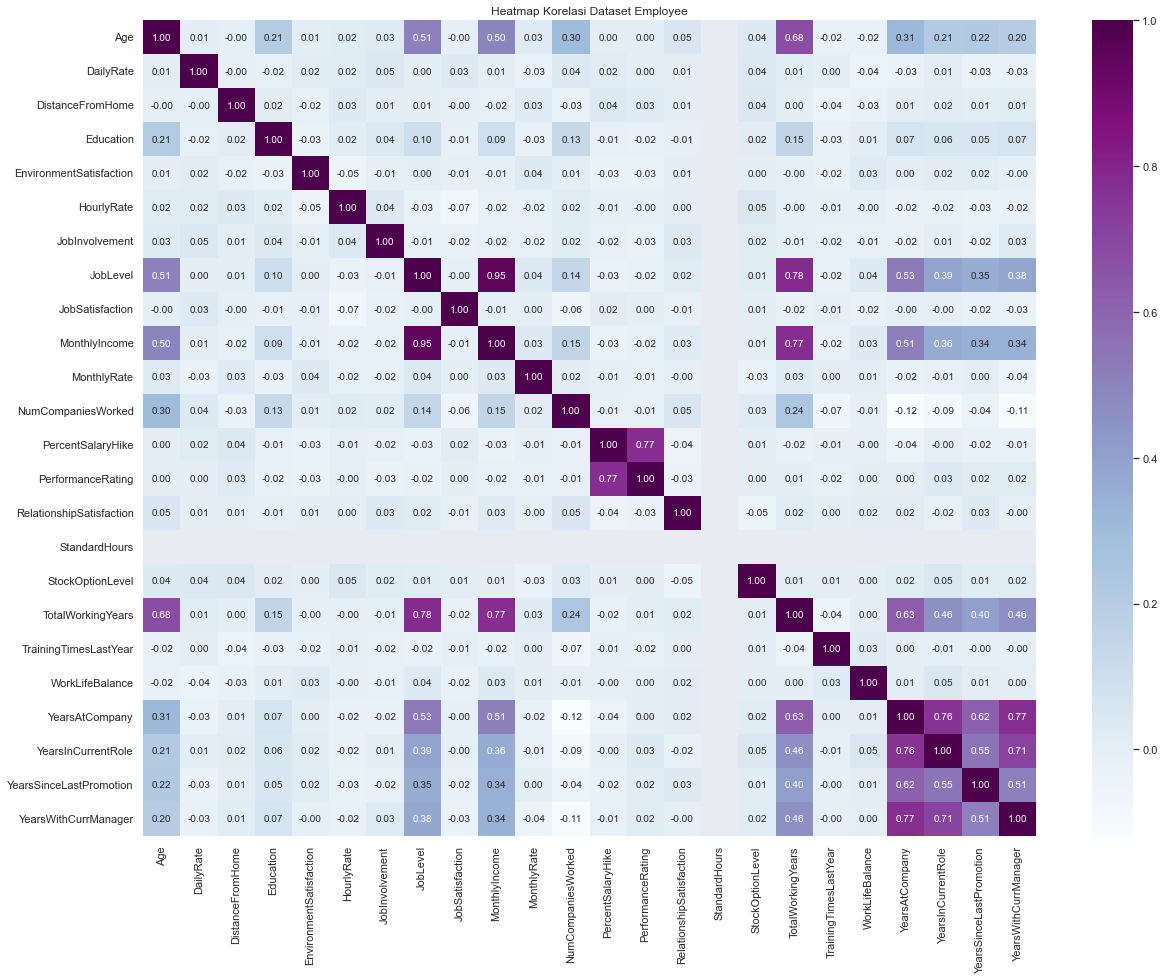

In [77]:
# Hitung korelasi antar kolom numerik
correlation_matrix = df.corr()


# Buat heatmap korelasi dengan seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title("Heatmap Korelasi Dataset Employee")
plt.show()

1. MonthlyIncome (Pendapatan Bulanan) dan JobLevel (Tingkat Pekerjaan): Terdapat korelasi yang kuat positif antara pendapatan bulanan dan tingkat pekerjaan. Hal ini wajar karena umumnya semakin tinggi tingkat pekerjaan, semakin tinggi pula pendapatan bulanan.

2. TotalWorkingYears (Total Tahun Bekerja) dan JobLevel (Tingkat Pekerjaan): Ada korelasi positif yang moderat antara total tahun bekerja dan tingkat pekerjaan. Karyawan dengan pengalaman kerja yang lebih lama cenderung memiliki tingkat pekerjaan yang lebih tinggi.

3. YearsAtCompany (Tahun Bekerja di Perusahaan) dan YearsInCurrentRole (Tahun di Posisi Saat Ini): Terdapat korelasi positif yang kuat antara tahun bekerja di perusahaan dan tahun di posisi saat ini. Ini mungkin menunjukkan bahwa karyawan yang telah lama bekerja di perusahaan juga telah lama berada di posisi mereka saat ini.

4. Age (Usia) dan TotalWorkingYears (Total Tahun Bekerja): Terdapat korelasi positif moderat antara usia dan total tahun bekerja. Ini menunjukkan bahwa semakin tua seseorang, biasanya semakin banyak tahun yang mereka habiskan bekerja.

5. PerformanceRating (Penilaian Kinerja) dan PercentSalaryHike (Kenaikan Gaji dalam Persentase): Ada korelasi positif yang kuat antara penilaian kinerja dan kenaikan gaji dalam persentase. Ini wajar, karena biasanya penilaian kinerja yang baik dapat mengarah pada kenaikan gaji yang lebih besar.

6. YearsAtCompany (Tahun Bekerja di Perusahaan) dan Age (Usia): Ada korelasi positif moderat antara tahun bekerja di perusahaan dan usia. Ini dapat menunjukkan bahwa karyawan yang telah lama bekerja di perusahaan cenderung lebih tua.

7. JobLevel (Tingkat Pekerjaan) dan MonthlyIncome (Pendapatan Bulanan): Korelasi yang kuat antara tingkat pekerjaan dan pendapatan bulanan dapat mengindikasikan bahwa posisi pekerjaan yang lebih tinggi biasanya diikuti oleh pendapatan yang lebih tinggi.

8. YearsInCurrentRole (Tahun di Posisi Saat Ini) dan YearsWithCurrManager (Tahun dengan Manajer Saat Ini): Ada korelasi yang kuat antara tahun di posisi saat ini dan tahun dengan manajer saat ini. Ini dapat menunjukkan bahwa karyawan yang telah lama di posisi saat ini juga telah lama bekerja dengan manajer yang sama.

# Deep Dive Question

### 1. Berapa banyak karyawan yang memilih untuk memutuskan hubungan kerja di perusahaan?

In [78]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


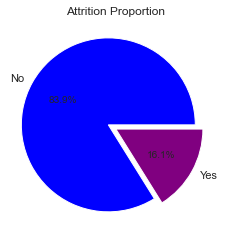

In [79]:
plt.pie(attrition_count['Attrition'], labels=['No', 'Yes'], explode=(0.1, 0), autopct='%1.1f%%', colors=['blue', 'purple'])
plt.title('Attrition Proportion')
plt.show()


1. Attrition 'Yes' : Terdapat 474 (16,1%) karyawan yang memutuskan untuk mengundurkan diri dari perusahaan
2. Attrition 'No' : Sisanya terdapat sekitar 2466 (83,9%) karyawan yang masih aktif di perusahaan

### 2. Berapa rata-rata gaji karyawan tiap bulan?

In [80]:
# Menghitung rata-rata gaji bulanan
mean_income = df['MonthlyIncome'].mean()
print("Rata-rata Gaji Bulanan:", mean_income)


Rata-rata Gaji Bulanan: 6502.931292517007


Gaji untuk rata-rata karyawan tiap bulan 6502

### 3. Di kelompok umur berapa kebanyakan karyawan yang bekerja di perusahaan?

In [81]:
def bin_age (x) : #Mendefinisikan fungsi dengan nama bin_age yang akan menerima satu parameter x, yang akan mewakili nilai umur (Age)
    if x<=30 : #Ini adalah bagian dari fungsi bin_age yang berfungsi sebagai pemilihan kondisi.
        return '21-30' #Jika kondisi pada baris sebelumnya terpenuhi (nilai umur kurang dari atau sama dengan 30), maka fungsi akan mengembalikan string '21-30', yang akan menjadi kategori untuk umur tersebut.
    elif x<=40 : #Bagian ini adalah untuk menambahkan kondisi alternatif. Jika kondisi sebelumnya tidak terpenuhi
        return '31-40' #Jika kondisi pada baris sebelumnya terpenuhi (nilai umur kurang dari atau sama dengan 40), maka fungsi akan mengembalikan string '31-40', sebagai kategori untuk umur tersebut.
    elif x<=50 : #Ini adalah kondisi lainnya, dan begitu seterusnya sampai kondisi terakhir 'else'.
        return '41-50'
    elif x<=60 :
        return '51-60'  
    else :
        return '61+'

In [82]:
df['age_cat'] = df['Age'].apply(bin_age) #Di baris ini, fungsi bin_age diaplikasikan pada kolom "Age" dalam dataframe 
df['age_cat'].unique() #Di baris ini, kita mencetak array atau list dari nilai unik dalam kolom "age_cat". 

array(['41-50', '31-40', '21-30', '51-60'], dtype=object)

<AxesSubplot:xlabel='age_cat', ylabel='count'>

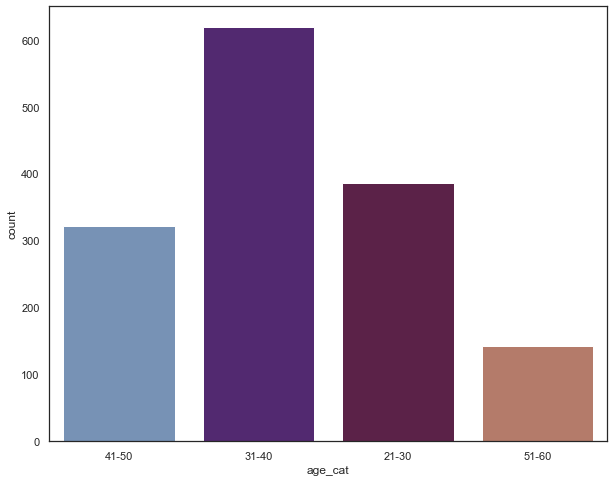

In [83]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=df['age_cat'], palette='twilight')

In [84]:
df.age_cat.value_counts()

31-40    619
21-30    386
41-50    322
51-60    143
Name: age_cat, dtype: int64

Kebanyakan umur karyawan yang bekerja di perusahaan berdasarkan pengelompokan umur yaitu mulai dari umur 31-40 sebanyak 1238 kemudian diikuti dengan kelompok umur 21-30 sebanyak 772, kelompok umur 41-50 sebanyak 644, dan kelompok umur 51-60 sebanyak 286 karyawan

### 4. Apa kebanykan status pernikahan karyawan yang bekerja pada perusahaan berdasarkan kelompok umur?

<AxesSubplot:xlabel='age_cat', ylabel='count'>

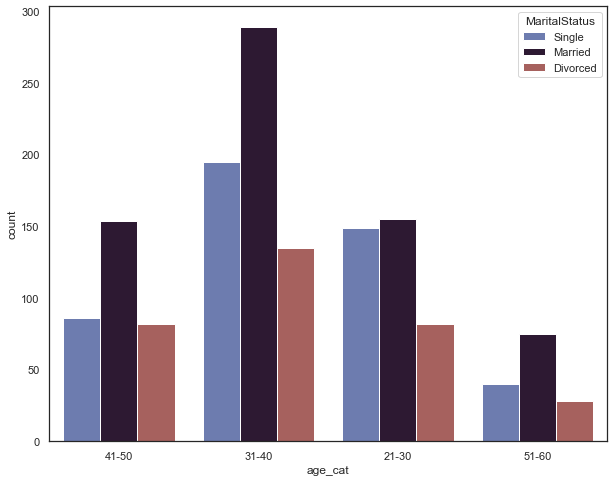

In [85]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=df['age_cat'],
            hue=df['MaritalStatus'], data=df,
            palette='twilight')

In [86]:
df.groupby(['age_cat', 'MaritalStatus']).size()

age_cat  MaritalStatus
21-30    Divorced          82
         Married          155
         Single           149
31-40    Divorced         135
         Married          289
         Single           195
41-50    Divorced          82
         Married          154
         Single            86
51-60    Divorced          28
         Married           75
         Single            40
dtype: int64

Status pernikahan kebanyakan karyawan yang bekerja pada perusahaan yaitu kebanyakan karyawan yang telah menikah pada tiap kelompok umur kemudian diikuti oleh status single dan bercerai.

### 5. Apa background pendidikan karyawan pada tiap kelompok umur?

<AxesSubplot:xlabel='age_cat', ylabel='count'>

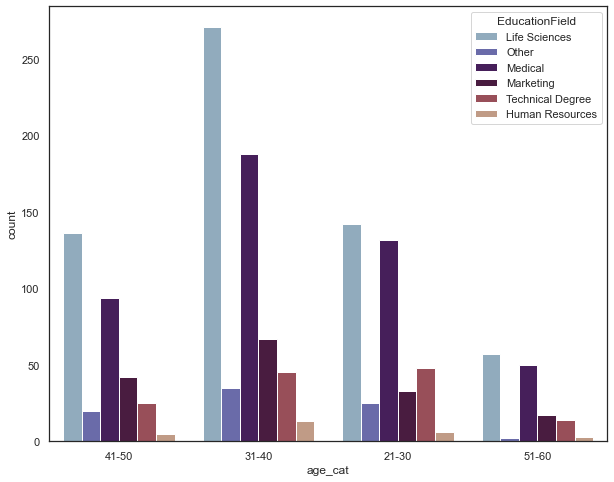

In [87]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=df['age_cat'],
            hue=df['EducationField'], data=df,
            palette='twilight')

In [88]:
df.groupby(['age_cat', 'EducationField']).size()

age_cat  EducationField  
21-30    Human Resources       6
         Life Sciences       142
         Marketing            33
         Medical             132
         Other                25
         Technical Degree     48
31-40    Human Resources      13
         Life Sciences       271
         Marketing            67
         Medical             188
         Other                35
         Technical Degree     45
41-50    Human Resources       5
         Life Sciences       136
         Marketing            42
         Medical              94
         Other                20
         Technical Degree     25
51-60    Human Resources       3
         Life Sciences        57
         Marketing            17
         Medical              50
         Other                 2
         Technical Degree     14
dtype: int64

### 6. Di kelompok usia mana karyawan yang banyak memilih untuk memutuskan hubungan kerja pada perusahaan?

<AxesSubplot:xlabel='age_cat', ylabel='count'>

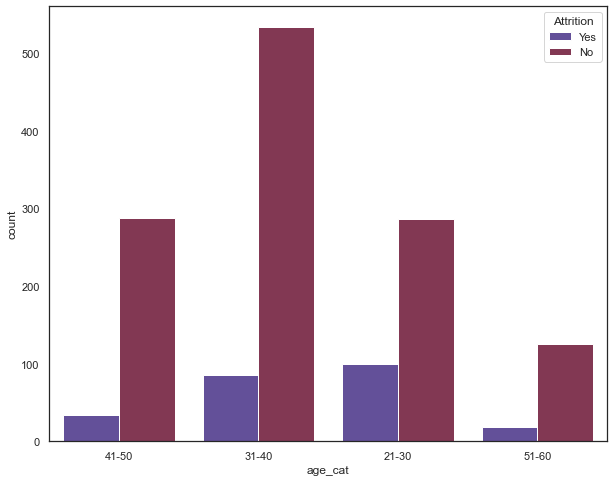

In [89]:
plt.figure(figsize=(10,8))
sns.set(style='white')
sns.countplot(x=df['age_cat'],
            hue=df['Attrition'], data=df,
            palette='twilight')

In [90]:
df.groupby(['age_cat', 'Attrition']).size()

age_cat  Attrition
21-30    No           286
         Yes          100
31-40    No           534
         Yes           85
41-50    No           288
         Yes           34
51-60    No           125
         Yes           18
dtype: int64

Kebanyakan karyawan yang berada pada kelompok umur 21-30 yaitu sebanyak 200 karyawan memilih untuk memutuskan hubungan kerja pada perusahaan kemudian diikuti dengan kelompok umur 31-40 sebanyak 170 karyawan, kelompok umur 41-50 sebanyak 68 karyawan dan kelompok umur 51-60 sebanyak 36 karyawan.

### 7. Bagaimana korelasi antara umur dan kepuasan kerja?

In [91]:
# Melihat korelasi antara umur dan kepuasan kerja
correlation = df['Age'].corr(df['JobSatisfaction'])
print("Korelasi antara Umur dan Kepuasan Kerja:", correlation)

Korelasi antara Umur dan Kepuasan Kerja: -0.004891877148687339


Korelasi antara Umur dan Kepuasan Kerja adalah -0.004891877148687344. Korelasi memiliki nilai antara -1 hingga 1, yang menunjukkan arah dan kekuatan hubungan linear antara dua variabel. Nilai korelasi yang mendekati 0 menunjukkan adanya hubungan lemah atau tidak ada hubungan linear antara kedua variabel tersebut.

Dalam kasus ini, nilai korelasi yang sangat mendekati 0 (-0.004891877148687344) menunjukkan bahwa tidak ada hubungan linier yang jelas antara umur dan kepuasan kerja dalam dataset tersebut. Artinya, dari data yang ada, tidak ada tren atau pola yang mengindikasikan bahwa semakin tinggi atau rendah usia seorang karyawan akan berdampak pada tingkat kepuasan kerjanya, dan sebaliknya.

1. Pada kelompok umur 41-50 terlihat bahwa lebih banyak karyawan yang memilih 'Yes' untuk memutuskan hubungan kerja pada perusahaan

2. Demikian juga pada kelompok umur 31-40 lebih banyak yang memilih 'Yes' memutuskan hubungan kerja kepada perusahaan.

3. Kelompok umur 21-30 sedikit lebih banyak yang memilih 'Yes' terhadap perusahaan

4. Berbeda dengan kelompok umur 51-60 yang lebih banyak memilih 'No' untuk tetap bekerja pada perusahaan

### 8. Bagaimana proporsi karyawan yang melakukan perjalanan bisnis

In [92]:
count_business_travel = df['BusinessTravel'].value_counts()

# Menghitung total karyawan dalam dataset
total_employees = df.shape[0]

# Menghitung proporsi karyawan yang melakukan perjalanan bisnis
proportion_business_travel = count_business_travel / total_employees

print("Proporsi karyawan yang melakukan perjalanan bisnis:")
print(proportion_business_travel)

Proporsi karyawan yang melakukan perjalanan bisnis:
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64


1. Travel_Rarely (70.95%): Proporsi karyawan yang melakukan perjalanan bisnis dengan kategori "Travel_Rarely" adalah sekitar 70.95%. Ini berarti mayoritas karyawan dalam dataset jarang melakukan perjalanan bisnis. Perjalanan bisnis mungkin bukan bagian utama dari pekerjaan mereka, dan mereka cenderung lebih banyak bekerja di kantor atau lokasi tetap.

2. Travel_Frequently (18.84%): Proporsi karyawan yang melakukan perjalanan bisnis dengan kategori "Travel_Frequently" adalah sekitar 18.84%. Ini menunjukkan bahwa sebagian kecil karyawan harus sering melakukan perjalanan bisnis sebagai bagian dari tugas atau tanggung jawab pekerjaan mereka. Hal ini dapat mencakup karyawan dengan peran penjualan atau tugas yang melibatkan kunjungan ke cabang atau lokasi lain secara rutin.

3. Non-Travel (10.20%): Proporsi karyawan yang tidak melakukan perjalanan bisnis (kategori "Non-Travel") adalah sekitar 10.20%. Ini berarti sebagian kecil karyawan dalam dataset tidak perlu melakukan perjalanan bisnis sama sekali, dan tugas mereka lebih terfokus pada lokasi tetap atau kantor.

### 9. Bagaimana Distribusi Usia, Gaji Bulanan, dan Tingkat Kepuasan Kerja di Antara Karyawan yang Mengundurkan Diri dan Tidak Mengundurkan Diri?

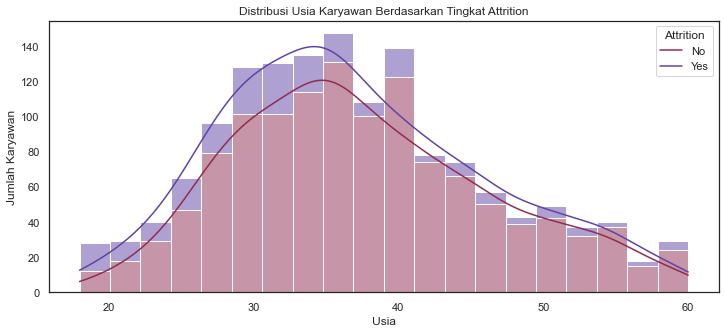

In [93]:
plt.figure(figsize=(12, 5))
sns.histplot(x='Age', hue='Attrition', bins=20, multiple='stack', kde=True, data=df,palette='twilight' )
plt.title("Distribusi Usia Karyawan Berdasarkan Tingkat Attrition")
plt.xlabel("Usia")
plt.ylabel("Jumlah Karyawan")
plt.legend(title='Attrition', labels=['No', 'Yes'])  # Mengatur label legend
plt.show()

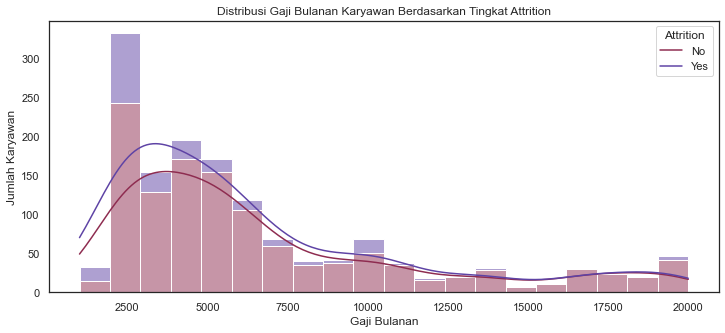

In [94]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', bins=20, multiple='stack', kde=True, palette='twilight')
plt.title("Distribusi Gaji Bulanan Karyawan Berdasarkan Tingkat Attrition")
plt.xlabel("Gaji Bulanan")
plt.ylabel("Jumlah Karyawan")
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

Karyawan yang memutuskan untuk memundurkan diri dari perusahaan berdasarkan distribusi gaji bulanan pada tingkat Attrition cenderung lebih banyak di gaji sekitar 2500 dan 5000

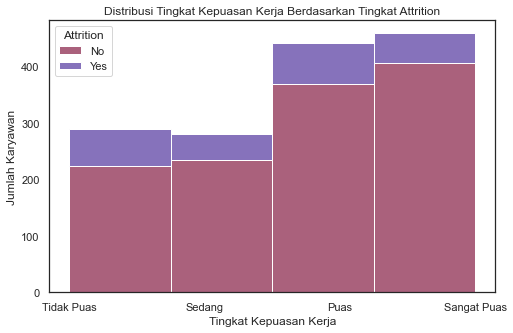

In [95]:
# Visualisasi Distribusi Tingkat Kepuasan Kerja
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition', bins=4, multiple='stack', palette='twilight')
plt.title("Distribusi Tingkat Kepuasan Kerja Berdasarkan Tingkat Attrition")
plt.xlabel("Tingkat Kepuasan Kerja")
plt.ylabel("Jumlah Karyawan")
plt.legend(title='Attrition', labels=['No', 'Yes'])  # Mengatur label legenda
plt.xticks([1, 2, 3, 4], ['Tidak Puas', 'Sedang', 'Puas', 'Sangat Puas'])
plt.show()

### 10 Apakah ada hubungan antara tingkat kepuasan kerja dan attrisi karyawan?

In [96]:
satisfaction_counts_attrition_yes = df[df['Attrition'] == 'Yes']['JobSatisfaction'].value_counts()
print("\nValue Counts Distribusi Tingkat Kepuasan Kerja Karyawan yang Mengundurkan Diri:")
print(satisfaction_counts_attrition_yes)


Value Counts Distribusi Tingkat Kepuasan Kerja Karyawan yang Mengundurkan Diri:
3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64


In [97]:
satisfaction_counts_attrition_no = df[df['Attrition'] == 'No']['JobSatisfaction'].value_counts()
print("\nValue Counts Distribusi Tingkat Kepuasan Kerja Karyawan yang Tidak Mengundurkan Diri:")
print(satisfaction_counts_attrition_no)


Value Counts Distribusi Tingkat Kepuasan Kerja Karyawan yang Tidak Mengundurkan Diri:
4    407
3    369
2    234
1    223
Name: JobSatisfaction, dtype: int64


In [103]:
# Memisahkan data karyawan yang attrisi dengan yang tidak attrisi
attrisi = df[df['Attrition'] == 'Yes']['JobSatisfaction']
non_attrisi = df[df['Attrition'] == 'No']['JobSatisfaction']

# Melakukan uji t-Student
statistic, p_value = ttest_ind(attrisi, non_attrisi)

# Menampilkan hasil uji
print("Hasil Uji t-Student:")
print("Nilai Statistik:", statistic)
print("Nilai p-Value:", p_value)

Hasil Uji t-Student:
Nilai Statistik: -3.9862267630568273
Nilai p-Value: 7.04306674173115e-05


Hasil Uji t-Student tersebut menunjukkan adanya korelasi atau hubungan yang signifikan antara tingkat kepuasan kerja dan attrisi karyawan. Nilai p-value yang sangat kecil (0.0000704306674173115) menunjukkan bahwa perbedaan dalam tingkat kepuasan kerja antara kelompok dengan attrisi dan kelompok tanpa attrisi tidak terjadi secara kebetulan.

Dalam konteks ini, kita dapat menyimpulkan bahwa tingkat kepuasan kerja memiliki pengaruh yang signifikan terhadap keputusan karyawan untuk meninggalkan perusahaan (attrisi). Dengan kata lain, semakin rendah tingkat kepuasan kerja seseorang, semakin besar kemungkinan mereka akan meninggalkan perusahaan.

In [101]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_cat
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,41-50
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,41-50
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,31-40
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,31-40
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,21-30


## Rekomendasi

Optimalkan Kebijakan Perjalanan Bisnis: Mayoritas karyawan dalam dataset jarang melakukan perjalanan bisnis. Ini bisa menjadi kesempatan untuk mengoptimalkan kebijakan perjalanan bisnis. Perusahaan dapat mempertimbangkan untuk mengurangi perjalanan bisnis yang tidak perlu dan menggantinya dengan solusi yang lebih efisien, seperti pertemuan virtual.

Perhatikan Karyawan yang Sering Perjalanan: Meskipun sebagian kecil, ada karyawan yang sering melakukan perjalanan bisnis. Perusahaan perlu memastikan bahwa mereka mendapatkan dukungan dan fasilitas yang diperlukan selama perjalanan. Keseimbangan antara pekerjaan di lokasi dan perjalanan perlu diperhatikan agar karyawan tetap produktif dan puas.

Pemahaman Tentang Gaji: Terlihat bahwa sebagian besar karyawan yang memutuskan untuk keluar memiliki gaji bulanan di sekitar 2500 dan 5000. Ini bisa menjadi tanda bahwa perusahaan perlu melakukan peninjauan ulang tentang struktur kompensasi mereka. Pastikan bahwa gaji dan insentif sesuai dengan standar industri dan dapat mempertahankan karyawan.

Kepuasan Kerja: Terdapat variasi dalam tingkat kepuasan kerja karyawan yang mengundurkan diri. Perusahaan perlu melakukan survei kepuasan karyawan dan mengidentifikasi masalah yang mungkin memengaruhi tingkat kepuasan. Langkah-langkah perbaikan dapat diambil berdasarkan temuan ini untuk mempertahankan karyawan yang ada.